In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotelsBooking.csv to hotelsBooking.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hotelsBooking.csv']))
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**DATA CLEANING AND GENERAL DESCRIPTIVE ANALYSIS**

In [ ]:
df_num=df.select_dtypes(exclude='object')#getting numerical columns in a separate data frame

In [ ]:
print("Mean/Average of all numeric columns:")
print(df_num.mean(axis = 0))
print()
print("Minimum of all numeric columns:")
print(df_num.min(axis = 0))
print()
print("Maximum of all numeric columns:")
print(df_num.max(axis = 0))

Mean/Average of all numeric columns:
is_canceled                          0.370416
lead_time                          104.011416
arrival_date_year                 2016.156554
arrival_date_week_number            27.165173
arrival_date_day_of_month           15.798241
stays_in_weekend_nights              0.927599
stays_in_week_nights                 2.500302
adults                               1.856403
children                             0.103890
babies                               0.007949
is_repeated_guest                    0.031912
previous_cancellations               0.087118
previous_bookings_not_canceled       0.137097
booking_changes                      0.221124
agent                               86.693382
company                            189.266735
days_in_waiting_list                 2.321149
adr                                101.831122
required_car_parking_spaces          0.062518
total_of_special_requests            0.571363
dtype: float64

Minimum of all numeric colu

In [ ]:
print("Mean/Average of all numeric rows:")
print(df_num.mean(axis = 1))
print()
print("Minimum of all numeric rows:")
print(df_num.min(axis = 1))
print()
print("Maximum of all numeric rows:")
print(df_num.max(axis = 1))

Mean/Average of all numeric rows:
0         132.777778
1         154.777778
2         118.166667
3         128.263158
4         126.315789
             ...    
119385    137.060000
119386    127.970000
119387    120.879474
119388    126.021053
119389    129.431579
Length: 119390, dtype: float64

Minimum of all numeric rows:
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Length: 119390, dtype: float64

Maximum of all numeric rows:
0         2015.0
1         2015.0
2         2015.0
3         2015.0
4         2015.0
           ...  
119385    2017.0
119386    2017.0
119387    2017.0
119388    2017.0
119389    2017.0
Length: 119390, dtype: float64


In [ ]:
# number of missing values of each column

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#unique values of each column

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print()

hotel
['Resort Hotel' 'City Hotel']

is_canceled
[0 1]

lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 1

In [ ]:
#Condition: Subset of the dataframe constituting all columns from the original data set but only those rows for which customer_type = Transient

In [ ]:
df[df['customer_type']=='Transient']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Condition: Subset of the dataframe whose columns are numeric and have their respective means >= 100

In [ ]:
df[[col for col in df.select_dtypes(exclude='object').columns if df[col].mean()>=100]]

,lead_time,arrival_date_year,company,adr
0,342,2015,NaN,0.00
1,737,2015,NaN,0.00
2,7,2015,NaN,75.00
3,13,2015,NaN,75.00
4,14,2015,NaN,98.00
...,...,...,...,...
119385,23,2017,NaN,96.14
119386,102,2017,NaN,225.43
119387,34,2017,NaN,157.71
119388,109,2017,NaN,104.40


**BUSINESS ANALYSIS**

In [ ]:
# most frequent customer_type grouped by hotel

In [ ]:
df.loc[:, ['hotel', 'customer_type']].groupby(['hotel']).agg(pd.Series.mode)

,customer_type
hotel,
City Hotel,Transient
Resort Hotel,Transient


In [ ]:
#removing duplicates

In [ ]:
df.duplicated().sum()

31994

In [ ]:
df.drop_duplicates(inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#rename axis labels

In [ ]:
import numpy as np
keys=np.array(df.index)
values=np.array(list(range(len(df))))

In [ ]:
(keys, values)

(array([     0,      1,      2, ..., 119387, 119388, 119389]),
 array([    0,     1,     2, ..., 87393, 87394, 87395]))

In [ ]:
df.rename(index={keys[i]:values[i] for i in range(len(keys))}, columns=str.upper)

,HOTEL,IS_CANCELED,LEAD_TIME,ARRIVAL_DATE_YEAR,ARRIVAL_DATE_MONTH,ARRIVAL_DATE_WEEK_NUMBER,ARRIVAL_DATE_DAY_OF_MONTH,STAYS_IN_WEEKEND_NIGHTS,STAYS_IN_WEEK_NIGHTS,ADULTS,...,DEPOSIT_TYPE,AGENT,COMPANY,DAYS_IN_WAITING_LIST,CUSTOMER_TYPE,ADR,REQUIRED_CAR_PARKING_SPACES,TOTAL_OF_SPECIAL_REQUESTS,RESERVATION_STATUS,RESERVATION_STATUS_DATE
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#use of replace

In [ ]:
df.replace({np.nan: 'NULL VALUE'})

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL VALUE,NULL VALUE,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL VALUE,NULL VALUE,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL VALUE,NULL VALUE,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NULL VALUE,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NULL VALUE,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NULL VALUE,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NULL VALUE,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NULL VALUE,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NULL VALUE,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#using map and lambda

In [ ]:
adr_mean=np.mean(df['adr'])
adr_std=np.std(df['adr'])

df['adr'].map(lambda x: ((x-adr_mean)/adr_std))

0        -1.932925
1        -1.932925
2        -0.569627
3        -0.569627
4        -0.151549
            ...   
119385   -0.185359
119386    2.164786
119387    0.933819
119388   -0.035214
119389    0.815484
Name: adr, Length: 87396, dtype: float64

**UNIVARIATE DISTRIBUTIONS**

In [ ]:
numeric_columns=list(df.select_dtypes(exclude='object').columns)

actual_numeric_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                          'adults', 'children', 'babies',
                          'previous_cancellations', 'previous_bookings_not_canceled' ,
                          'booking_changes', 'days_in_waiting_list',
                          'adr', 'required_car_parking_spaces',
                          'total_of_special_requests']

In [ ]:
def calculate_row_num(col_num, len_num):
    rem = len_num%col_num
    if (rem) == 0:
        row_num = len_num // col_num
    elif (rem) != 0:
        row_num = (len_num + col_num - rem) // col_num
    if len_num == col_num:
        return row_num + 1
    return row_num

def plot_univariate_subplots(df,
                             col_num,
                             plot_type,
                             figsize = (30,30),
                             color_hue = None,
                             log_scale = False,
                             wspace = 0.25,
                             hspace = 0.6,
                             numeric_columns = numeric_columns
                             ):
    len_num = len(numeric_columns)
    row_num = calculate_row_num(col_num, len_num)
    fig, axes = plt.subplots(row_num, col_num, figsize=figsize)
    index = 0

    if plot_type == 'boxplot':
        graph_plot = lambda plot_type: sns.boxplot(data=df,
                                                   x=numeric_columns[index],
                                                   ax=axes[row,col],
                                                   color = color_hue)
    elif plot_type == 'kde':
        graph_plot = lambda plot_type: sns.kdeplot(data=df,
                                                   x=numeric_columns[index],
                                                   log_scale = log_scale,
                                                   ax=axes[row,col],
                                                   hue = color_hue,
                                                   bw_adjust=.30)
    elif plot_type == 'hist':
         graph_plot = lambda plot_type: sns.histplot(data=df,
                                                     x=numeric_columns[index],
                                                     log_scale = log_scale,
                                                     multiple = 'stack',
                                                     ax=axes[row,col],
                                                     hue = color_hue)
    elif plot_type == 'count':
        graph_plot = lambda plot_type: sns.countplot(data = df,
                                                     x=numeric_columns[index],
                                                     ax=axes[row,col],
                                                     hue = color_hue)
    for row in range(row_num):
        for col in range(col_num):
            if index>=len(numeric_columns):
                axes[row,col].set_axis_off()
            if index<len(numeric_columns):
                graph_plot(plot_type)
            index = index + 1
    plt.subplots_adjust(wspace=wspace, hspace=hspace)

In [ ]:
#box plots

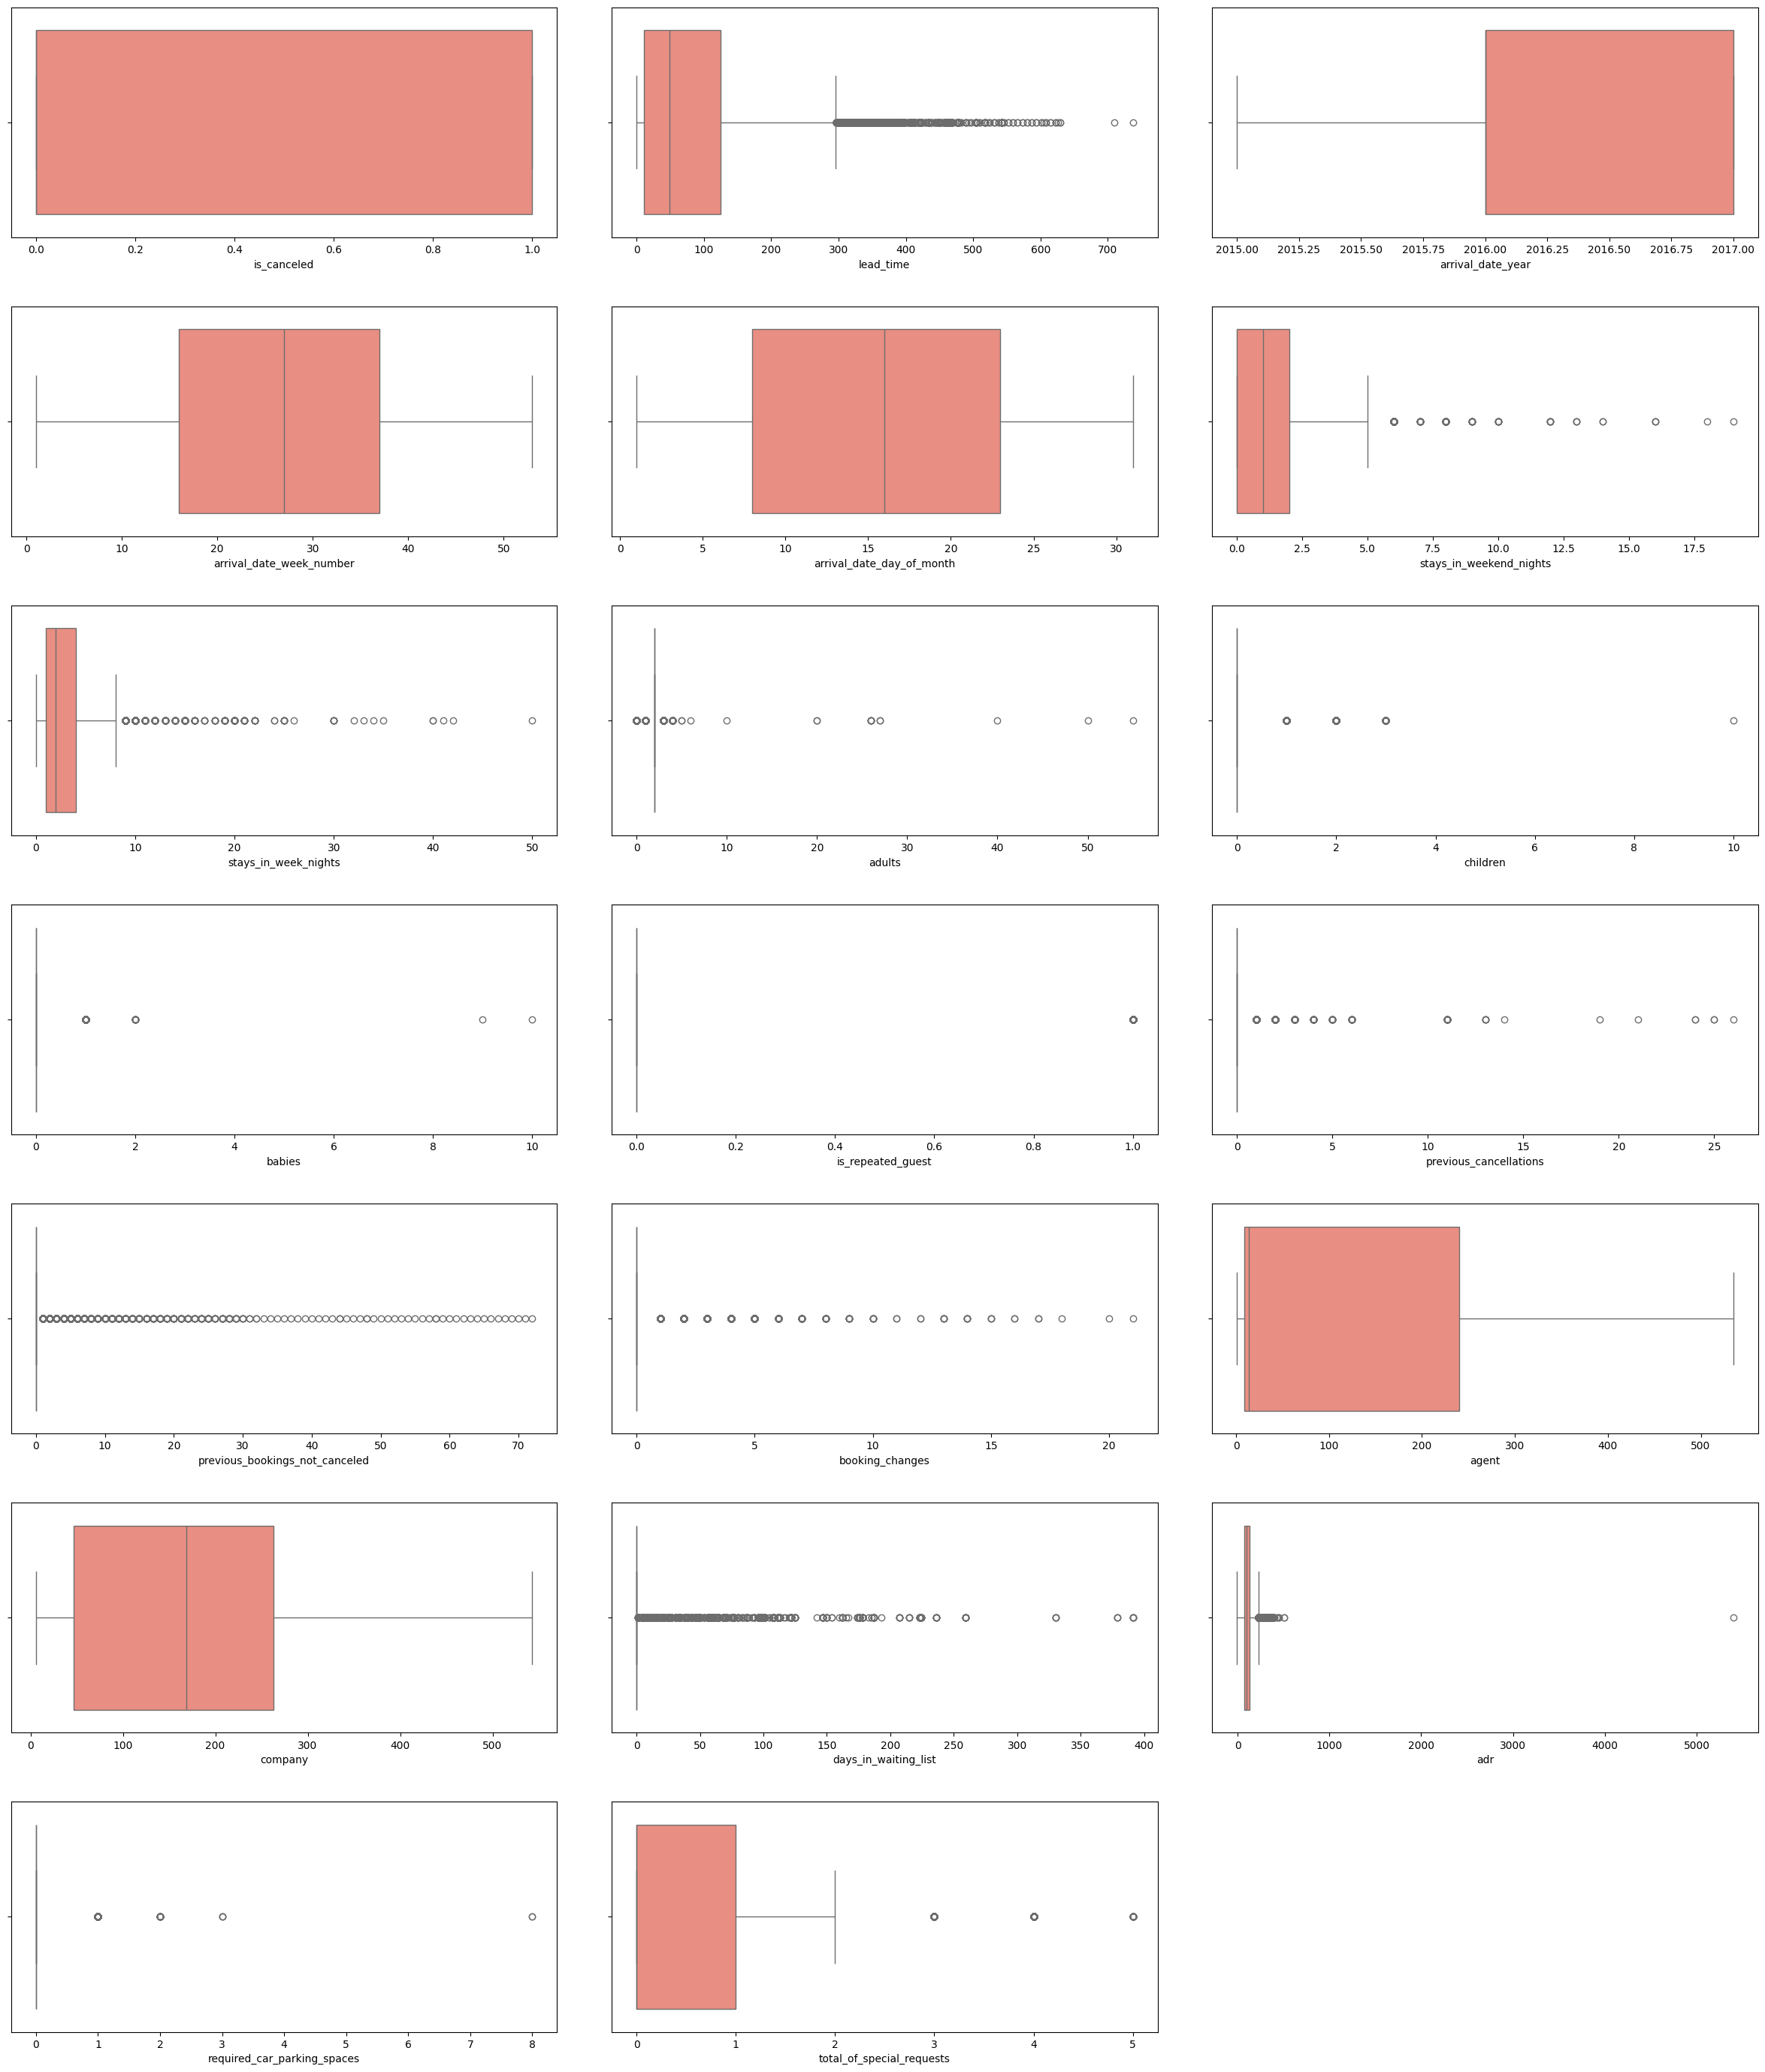

In [ ]:
plot_univariate_subplots(df = df,
                         col_num = 3,
                         plot_type = 'boxplot',
                         figsize = (30,35),
                         color_hue = 'salmon',
                         wspace = 0.1,
                         hspace = 0.3,
                         numeric_columns = numeric_columns)

In [ ]:
#extreme outlier in adr detected by inspecting the box plot of adr

In [ ]:
df = df[df.adr < 3000].copy()

In [ ]:
#function to detect univariate outliers and return dataframe as well as indexes

In [ ]:
def detect_univ_outliers(df,
                         column,
                         upper_limit = 0.98,
                         lower_limit = 0.02,
                         k = 1):

        upper_quantile = np.quantile(df[column],upper_limit)
        lower_quantile = np.quantile(df[column],lower_limit)

        outliers = df[((df[column]) > k*upper_quantile) | ((df[column])< k*lower_quantile)]

        return outliers, outliers.index

In [ ]:
outliers, outliers_index = detect_univ_outliers(df, 'lead_time')
outliers.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,...,No Deposit,40.0,NaN,0,Contract,55.68,0,0,Canceled,2015-05-19
82,Resort Hotel,0,364,2015,July,27,3,3,7,2,...,No Deposit,40.0,NaN,0,Contract,55.68,0,0,Check-Out,2015-07-13
85,Resort Hotel,0,324,2015,July,27,3,4,10,2,...,No Deposit,40.0,NaN,0,Contract,134.73,0,0,Check-Out,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119143,City Hotel,0,323,2017,August,35,29,0,1,2,...,No Deposit,9.0,NaN,0,Transient,125.10,0,2,Check-Out,2017-08-30
119148,City Hotel,0,457,2017,August,34,25,2,3,2,...,No Deposit,6.0,NaN,0,Transient-Party,122.40,0,1,Check-Out,2017-08-30
119228,City Hotel,0,341,2017,August,35,27,2,3,2,...,No Deposit,22.0,NaN,0,Transient,96.91,0,1,Check-Out,2017-09-01
119297,City Hotel,0,332,2017,August,35,31,0,2,2,...,No Deposit,9.0,NaN,0,Transient,170.80,0,2,Check-Out,2017-09-02


In [ ]:
#total number of univariate outliers per column

In [ ]:
upper_limit = 0.985
lower_limit = 0.015
k = 1
padding = ' ' + '.' * 50
print("Total number of entries: ", len(df))
print(f"Number of univariate outliers (>{upper_limit} or <{lower_limit} quantiles):\n")
outliers_index_combined = set()
for column in actual_numeric_columns:
    outliers, outliers_index = detect_univ_outliers(df, column, upper_limit, lower_limit, k)
    outliers_index_combined = outliers_index_combined | set(list(outliers_index))
    print('{:.40s} {}'.format(column + padding, len(outliers)))

Total number of entries:  87395
Number of univariate outliers (>0.985 or <0.015 quantiles):

lead_time .............................. 1296
stays_in_weekend_nights ................ 290
stays_in_week_nights ................... 340
adults ................................. 461
children ............................... 0
babies ................................. 914
previous_cancellations ................. 278
previous_bookings_not_canceled ......... 1152
booking_changes ........................ 617
days_in_waiting_list ................... 860
adr .................................... 1304
required_car_parking_spaces ............ 33
total_of_special_requests .............. 356


In [ ]:
outliers_index_combined = list(outliers_index_combined)
print("Number of outliers determined via univariate outlier detection (without duplicates):",len(outliers_index_combined))

Number of outliers determined via univariate outlier detection (without duplicates): 7024


In [ ]:
#numerical distribution

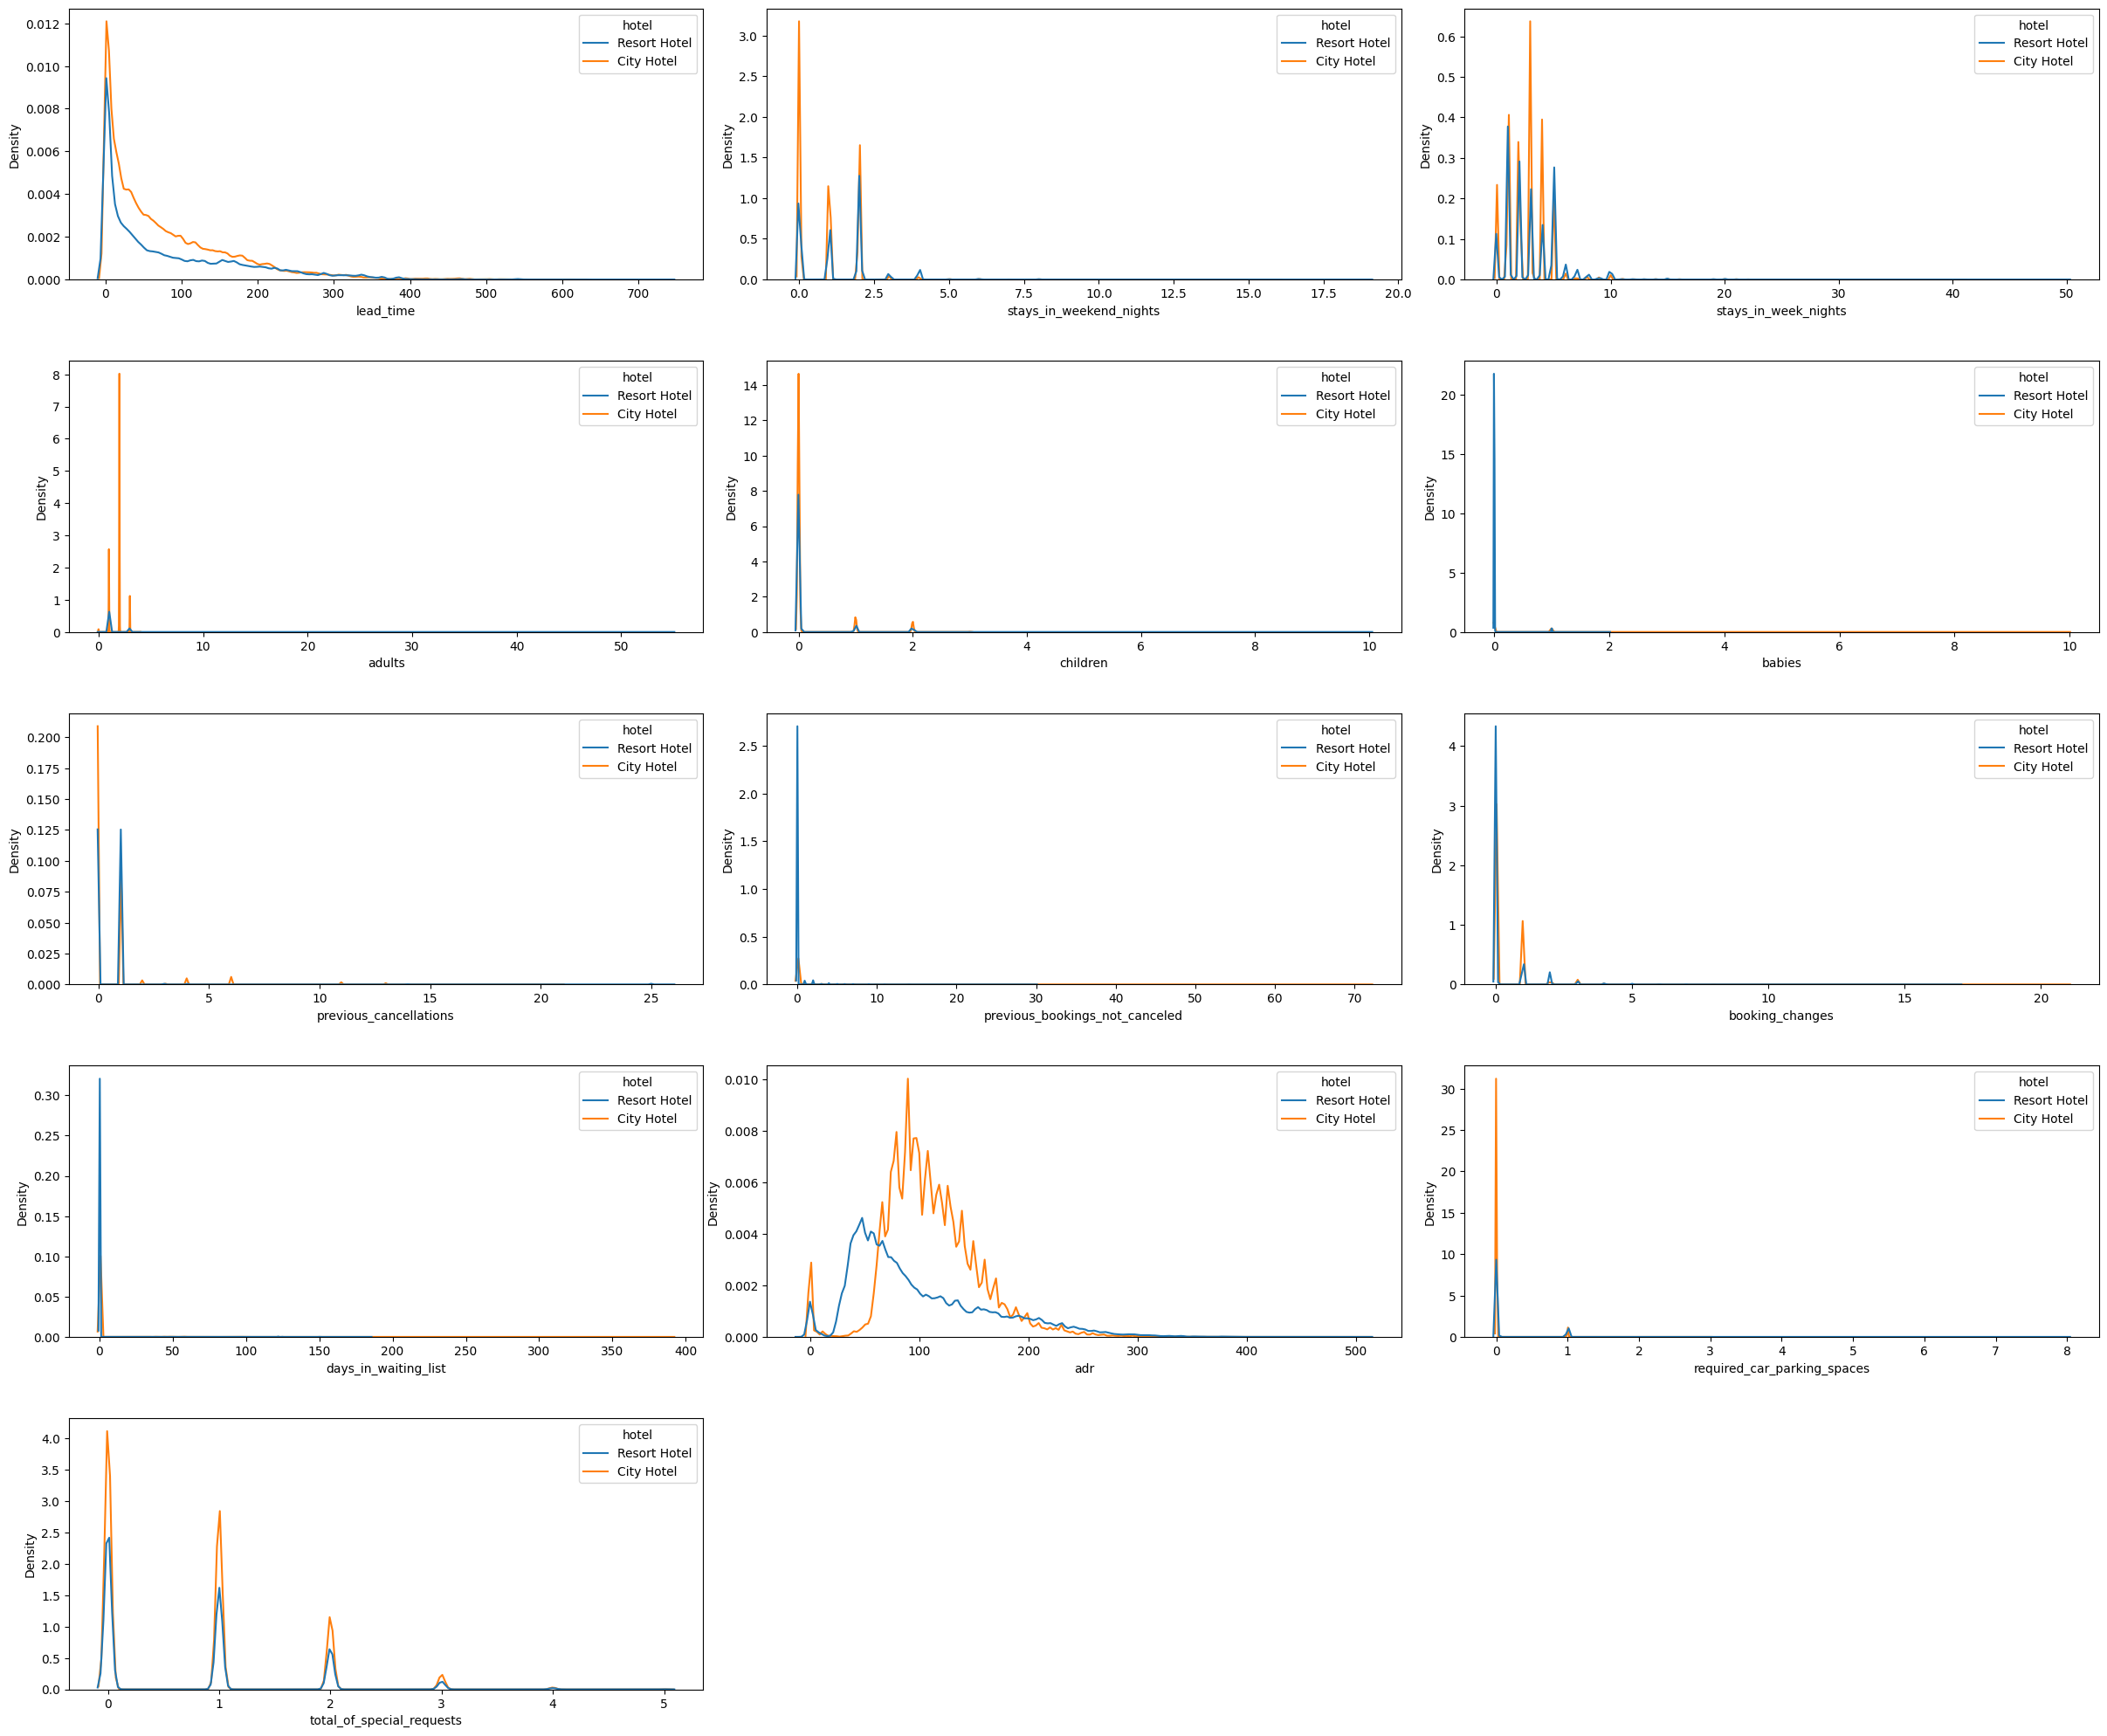

In [ ]:
plot_univariate_subplots(df = df,
                         col_num = 3,
                         plot_type = 'kde',
                         figsize = (30,25),
                         color_hue = 'hotel',
                         log_scale = False,
                         wspace = 0.1,
                         hspace = 0.3,
                         numeric_columns = actual_numeric_columns)

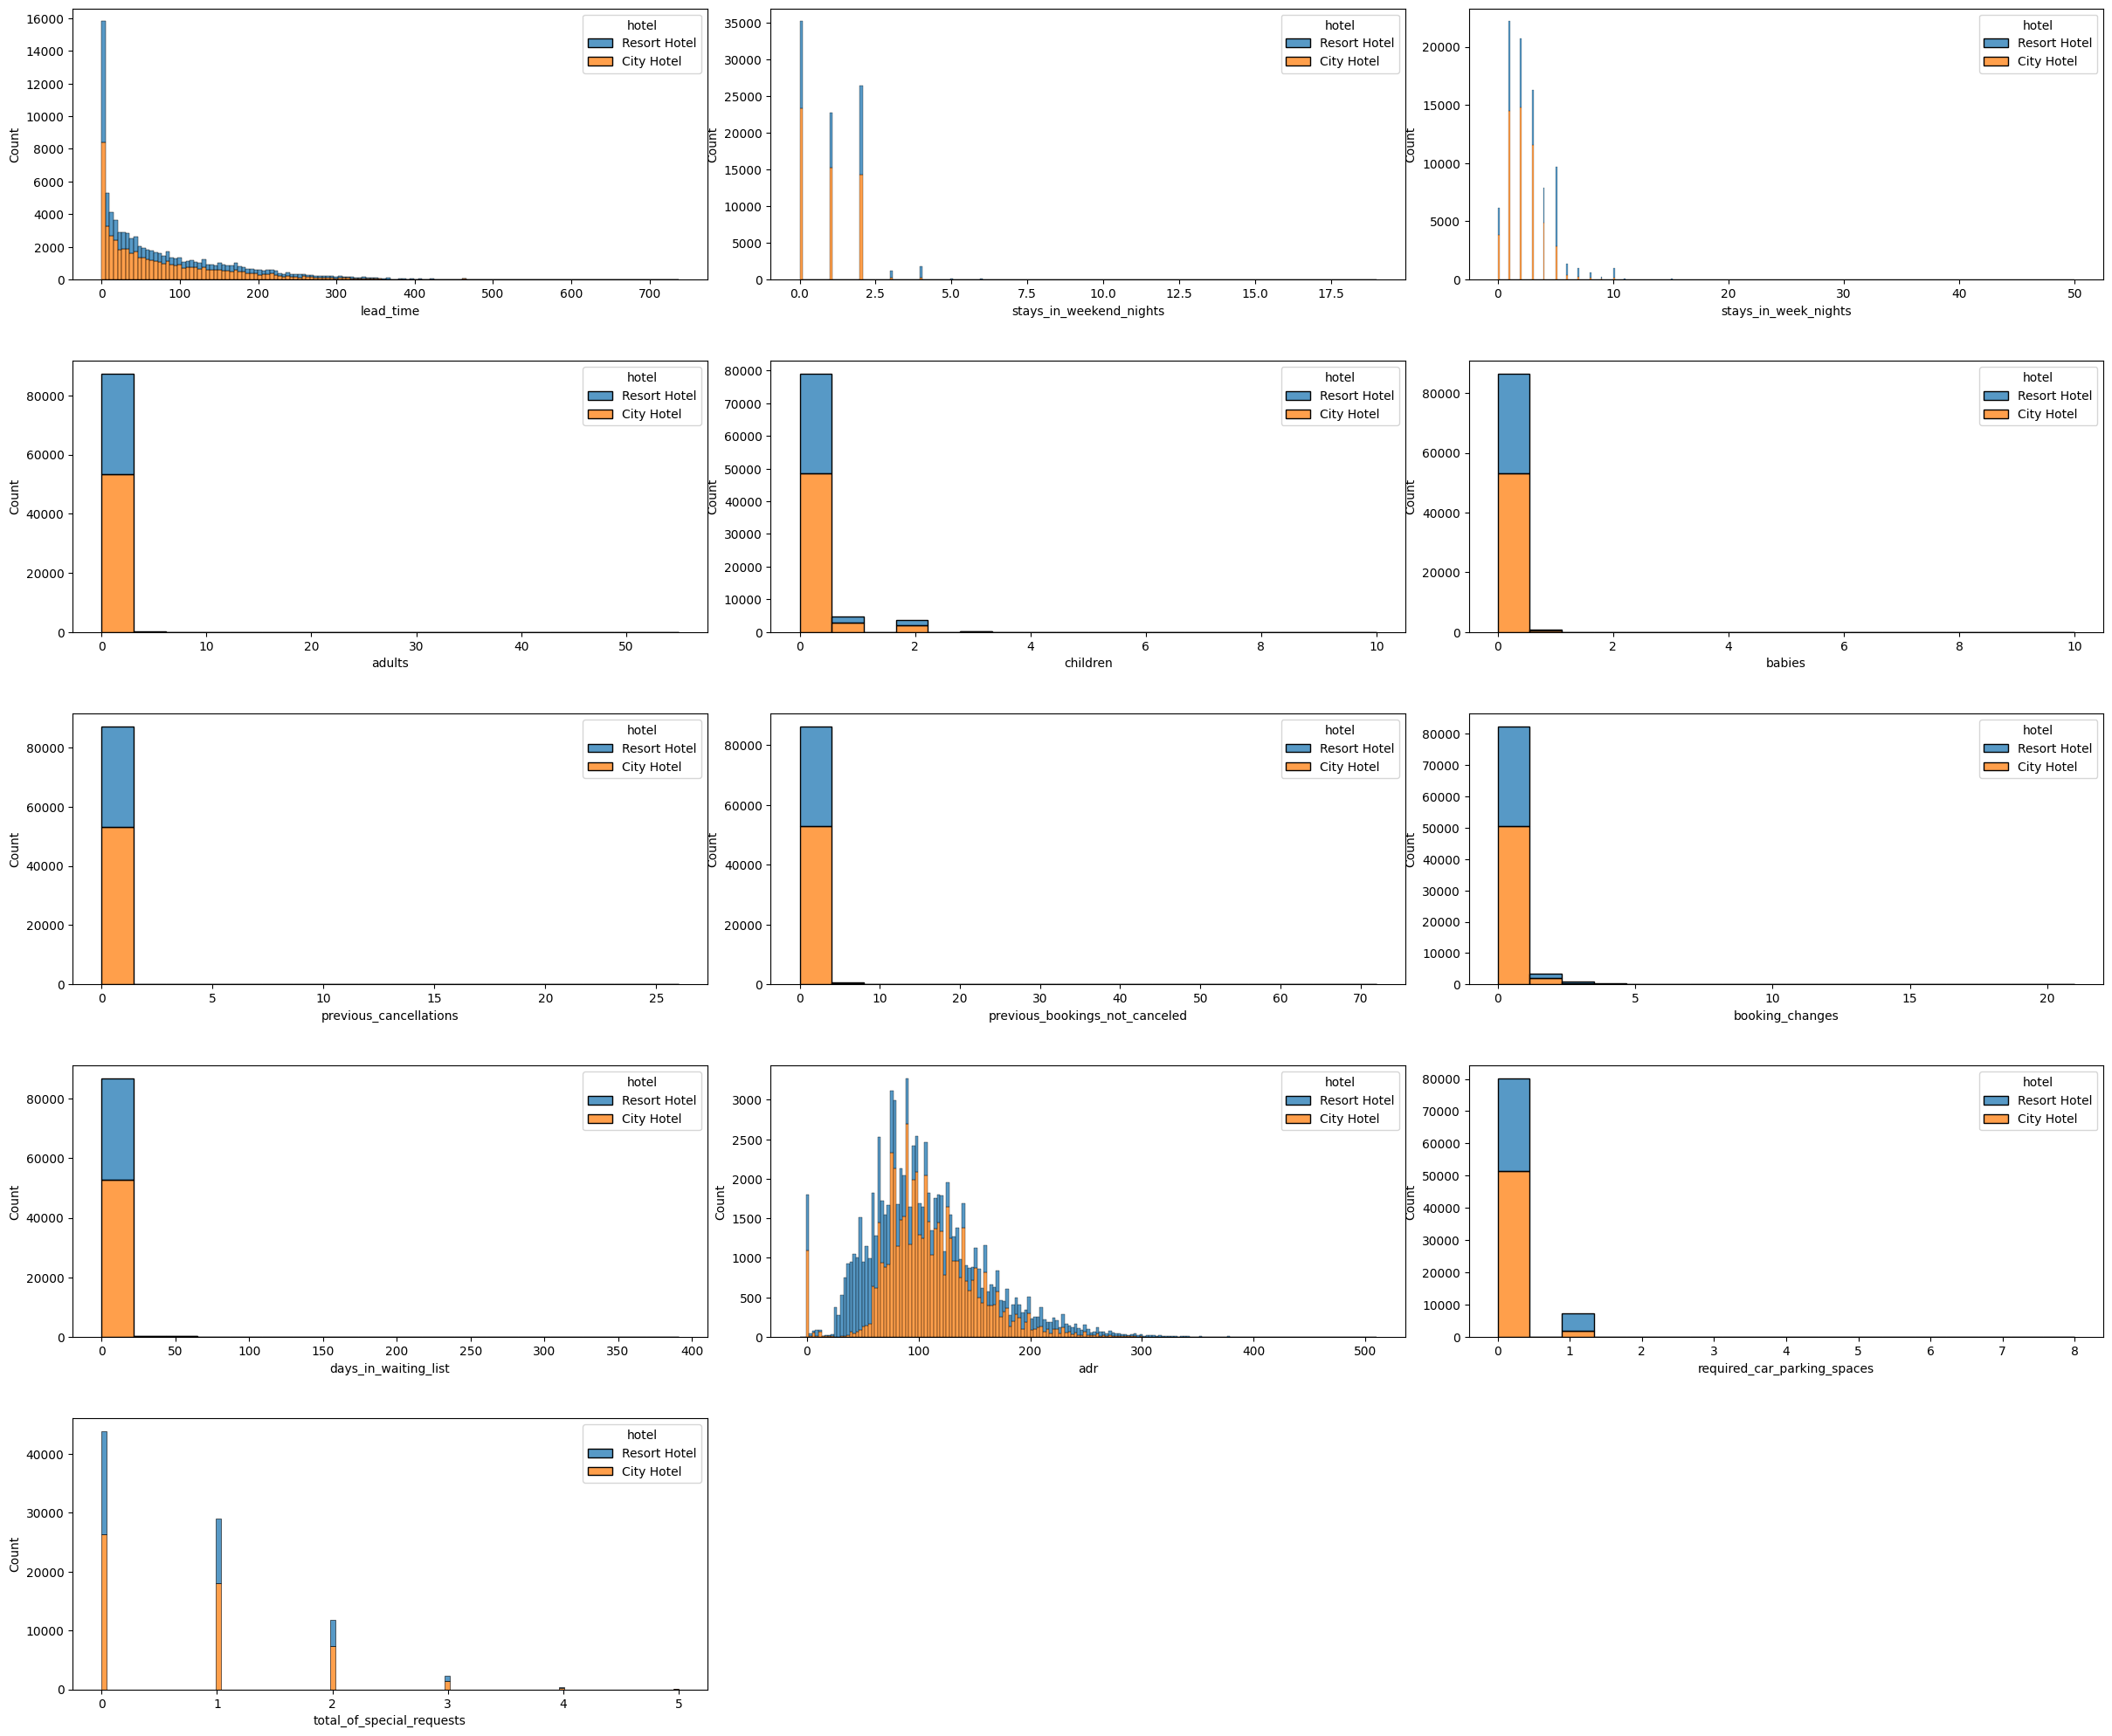

In [ ]:
plot_univariate_subplots(df = df,
                         col_num = 3,
                         plot_type = 'hist',
                         figsize = (30,25),
                         color_hue = 'hotel',
                         log_scale = False,
                         wspace = 0.1,
                         hspace = 0.3,
                         numeric_columns = actual_numeric_columns)

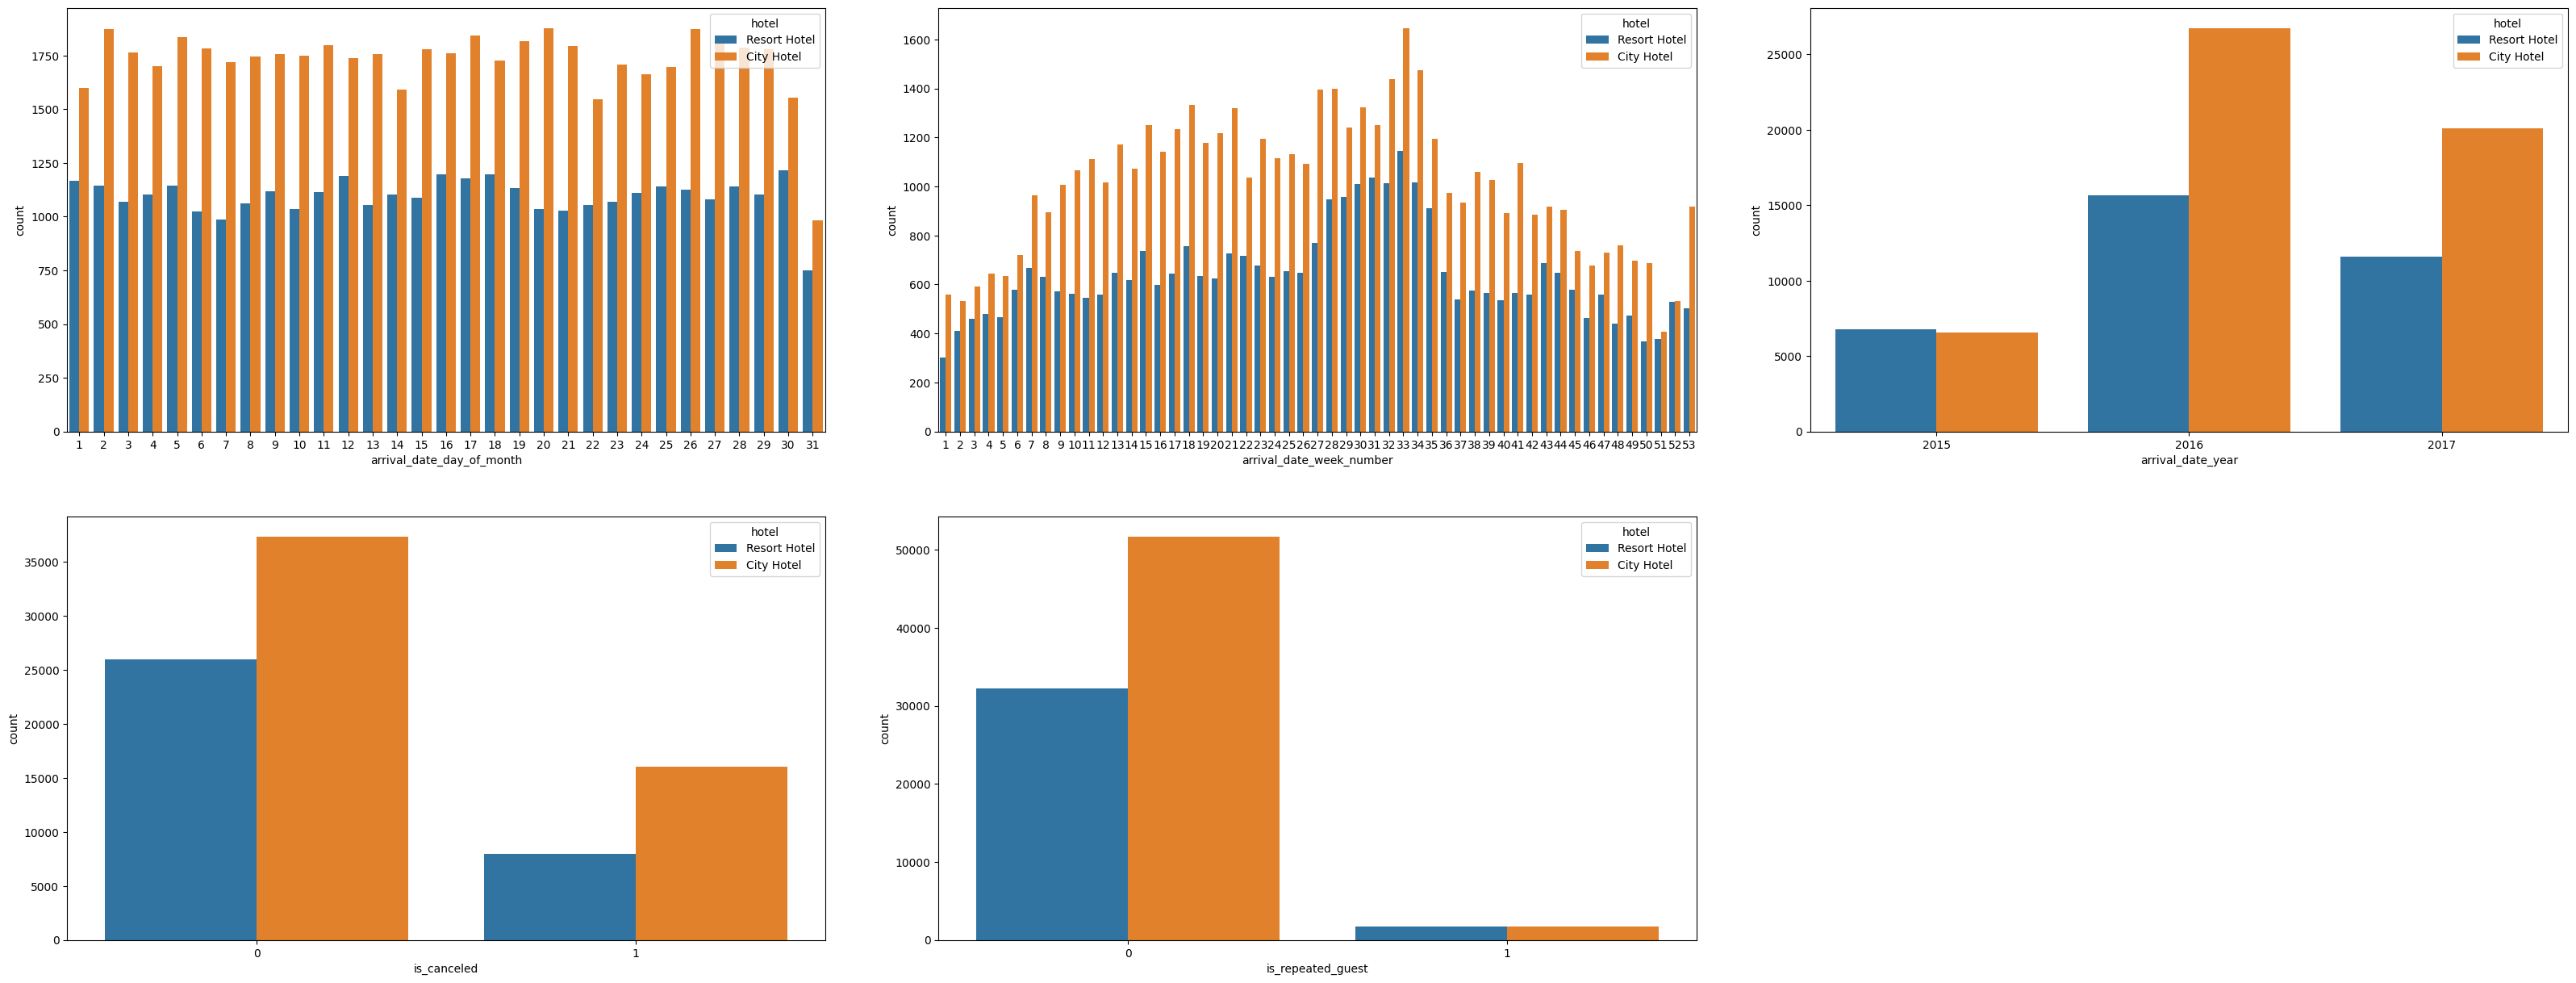

In [ ]:
plot_univariate_subplots(df = df,
                         col_num = 3,
                         plot_type = 'count',
                         figsize = (40,15),
                         color_hue = 'hotel',
                         wspace = 0.15,
                         hspace = 0.2,
                         numeric_columns = list(set(numeric_columns) - set(actual_numeric_columns) - {'agent','company'}))

In [ ]:
#separate graph analysis

In [ ]:
df1=df[df['is_canceled']==0]

In [ ]:
px.box(data_frame=df1, x='reserved_room_type', y='adr', color='hotel')

In [ ]:
#for both of the hotels there are different room types and the adr varies accordingly

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#over the year we can analyze how the prices vary per night for both the hotels

In [ ]:
resort_data=df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
city_data=df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]

In [ ]:
resort_hotel=resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,76.841664
1,August,182.103524
2,December,63.977295
3,February,53.624311
4,January,48.542066
5,July,150.914540
6,June,108.970363
7,March,57.083964
8,May,77.725129
9,November,48.928493


In [ ]:
city_hotel=city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,114.121066
1,August,122.497179
2,December,90.111067
3,February,87.843338
4,January,83.180097
5,July,119.740148
6,June,120.486062
7,March,90.759820
8,May,124.533785
9,November,87.751507


In [ ]:
merged_hotel=resort_hotel.merge(city_hotel, on='arrival_date_month')
merged_hotel.columns=['Month', 'Resort Hotel Price', 'City Hotel Price']
merged_hotel

,Month,Resort Hotel Price,City Hotel Price
0,April,76.841664,114.121066
1,August,182.103524,122.497179
2,December,63.977295,90.111067
3,February,53.624311,87.843338
4,January,48.542066,83.180097
5,July,150.914540,119.740148
6,June,108.970363,120.486062
7,March,57.083964,90.759820
8,May,77.725129,124.533785
9,November,48.928493,87.751507


In [ ]:
#we need to order the month column from Jan to Dec

In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3420 sha256=cff7732516d3402671548846c65479351955ce37a278a7bd84fa46279e0cf1e3
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3224 sha256=fc03088def76d4f303c0ed3d502bdb1f31f6b09bb8c4fbc6f7582b83b9cc5dab
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sdmw
def sort_monthwise(df, column_name):
  return sdmw.Sort_Dataframeby_Month(df, column_name)

In [ ]:
finalPrice=sort_monthwise(merged_hotel, 'Month')

In [ ]:
finalPrice

,Month,Resort Hotel Price,City Hotel Price
0,January,48.542066,83.180097
1,February,53.624311,87.843338
2,March,57.083964,90.759820
3,April,76.841664,114.121066
4,May,77.725129,124.533785
5,June,108.970363,120.486062
6,July,150.914540,119.740148
7,August,182.103524,122.497179
8,September,98.855456,116.723183
9,October,62.578195,105.140685


In [ ]:
plt.figure(figsize=(15, 7))
px.line(finalPrice, x='Month', y=['Resort Hotel Price', 'City Hotel Price'], title='Variation of room price per night over the year')

<Figure size 1500x700 with 0 Axes>

In [ ]:
#from the graph above we can observe that prices of resort hotel touch record high during the summer months

In [ ]:
#bivariate analysis

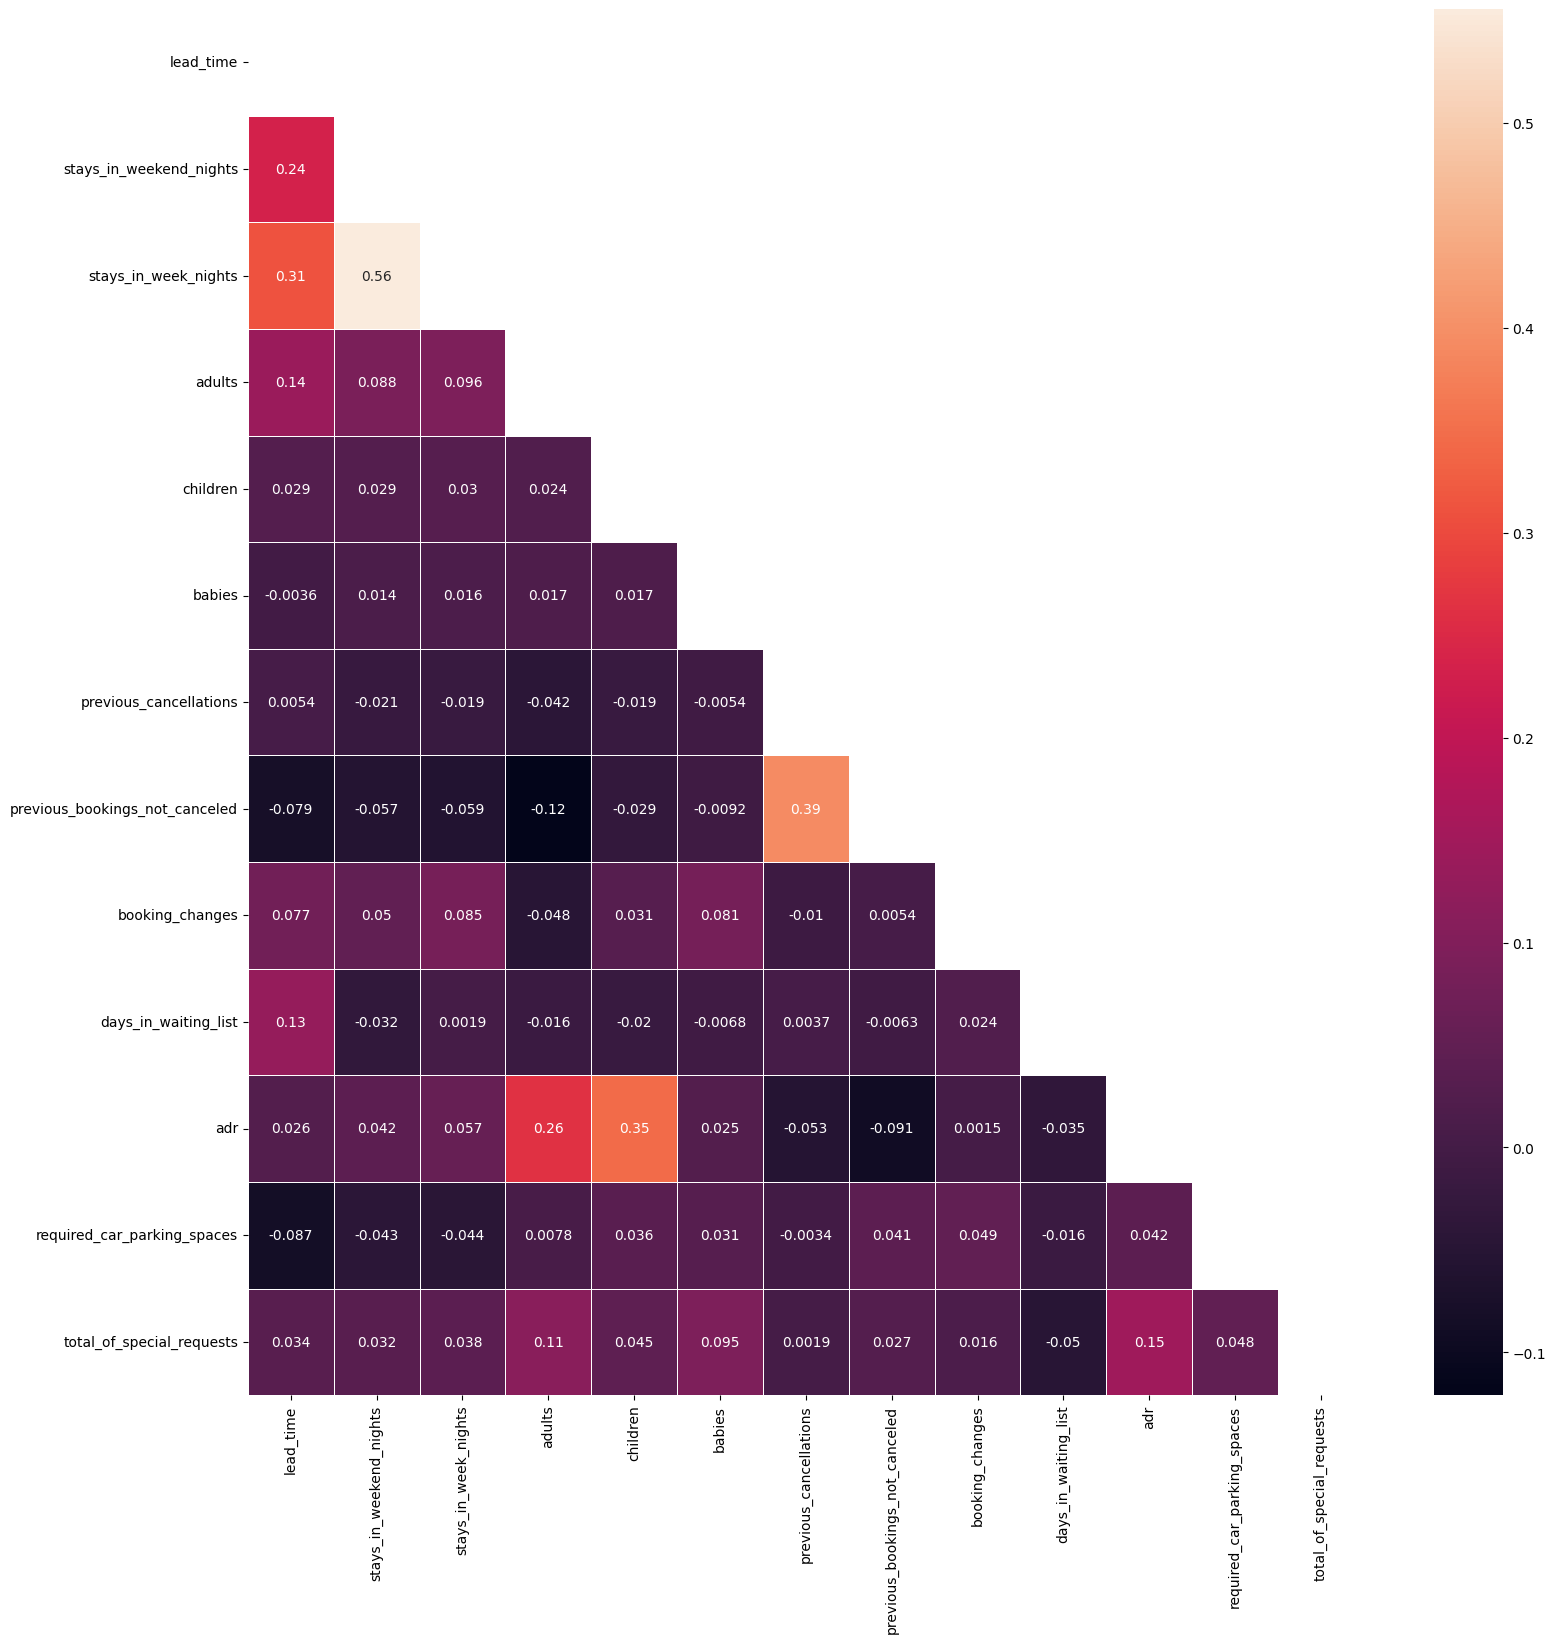

In [ ]:
temp = df.loc[:,actual_numeric_columns].corr()
fig,axes = plt.subplots(figsize=(18, 18))
matrix = np.triu(temp)
sns.heatmap(temp, annot=True, linewidths=.5,ax=axes, mask=matrix)
plt.show()

In [ ]:
def plot_bivariate_subplots(df,
                           dep_var,
                           col_num,
                           figsize = (30,30),
                           plot_type = 'scatter',
                           hue = None,
                           palette = None,
                           split = False,
                           wspace = 0.25,
                           hspace = 0.6,
                           numeric_columns = numeric_columns):
    len_num = len(numeric_columns)
    row_num = calculate_row_num(col_num, len_num)

    fig, axes = plt.subplots(row_num, col_num, figsize=figsize)
    index = 0

    if plot_type == 'scatter':
        graph_plot = lambda plot_type: sns.scatterplot(data = df,
                                                       x = numeric_columns[index],
                                                       y = dep_var,
                                                       ax = axes[row,col],
                                                       hue = hue,
                                                       palette = palette,
                                                       alpha = 0.5)

    elif plot_type == 'bar':
        graph_plot = lambda plot_type: sns.barplot(data = df,
                                                   x = numeric_columns[index],
                                                   y = dep_var,
                                                   hue = hue,
                                                   ax = axes[row,col],
                                                   palette = palette)
    elif plot_type == 'box':
        graph_plot = lambda plot_type: sns.boxplot(data = df,
                                                   x = numeric_columns[index],
                                                   y = dep_var,
                                                   hue = hue,
                                                   ax = axes[row,col],
                                                   palette = palette)
    elif plot_type == 'violin':
        graph_plot = lambda plot_type: sns.violinplot(data = df,
                                                      x = numeric_columns[index],
                                                      y = dep_var,
                                                      hue = hue,
                                                      split = split,
                                                      ax = axes[row,col],
                                                      palette = palette)
    for row in range(row_num):
        for col in range(col_num):
            if index>=len(numeric_columns):
                axes[row,col].set_axis_off()
            if index<len(numeric_columns):
                graph_plot(plot_type)
                axes[row,col].set_xlabel(f"{numeric_columns[index].title()}")
            index = index + 1
    plt.subplots_adjust(wspace = wspace, hspace = hspace)

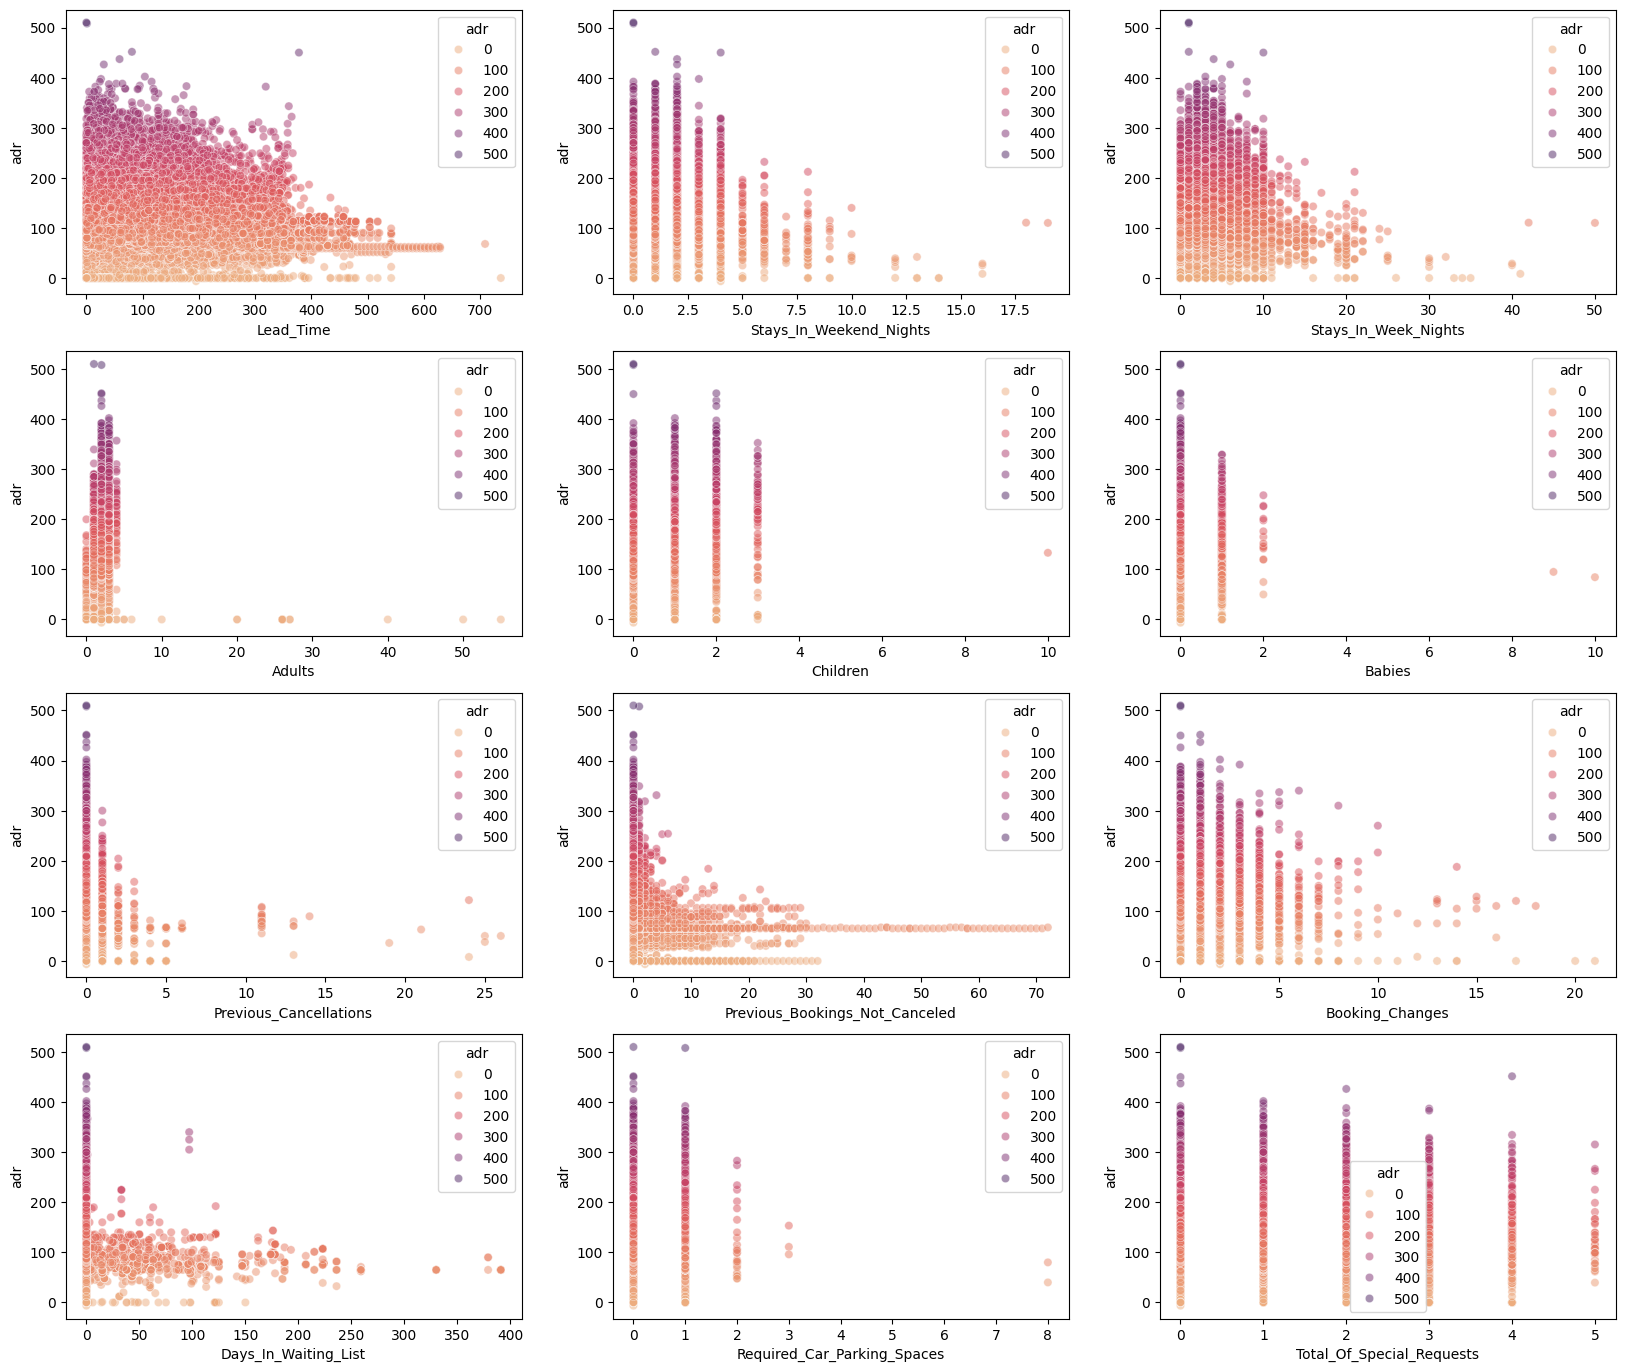

In [ ]:
dep_var = 'adr'
num_cols = [col for col in actual_numeric_columns]
try:
    num_cols.remove(dep_var)
except:
    pass
col_num = 3

plot_bivariate_subplots(df = df,
                        dep_var = dep_var,
                        col_num = col_num,
                        figsize = (20,17),
                        plot_type = 'scatter',
                        hue = dep_var,
                        palette = sns.color_palette("flare", as_cmap=True),
                        wspace = 0.2,
                        hspace = 0.2,
                        numeric_columns = num_cols)

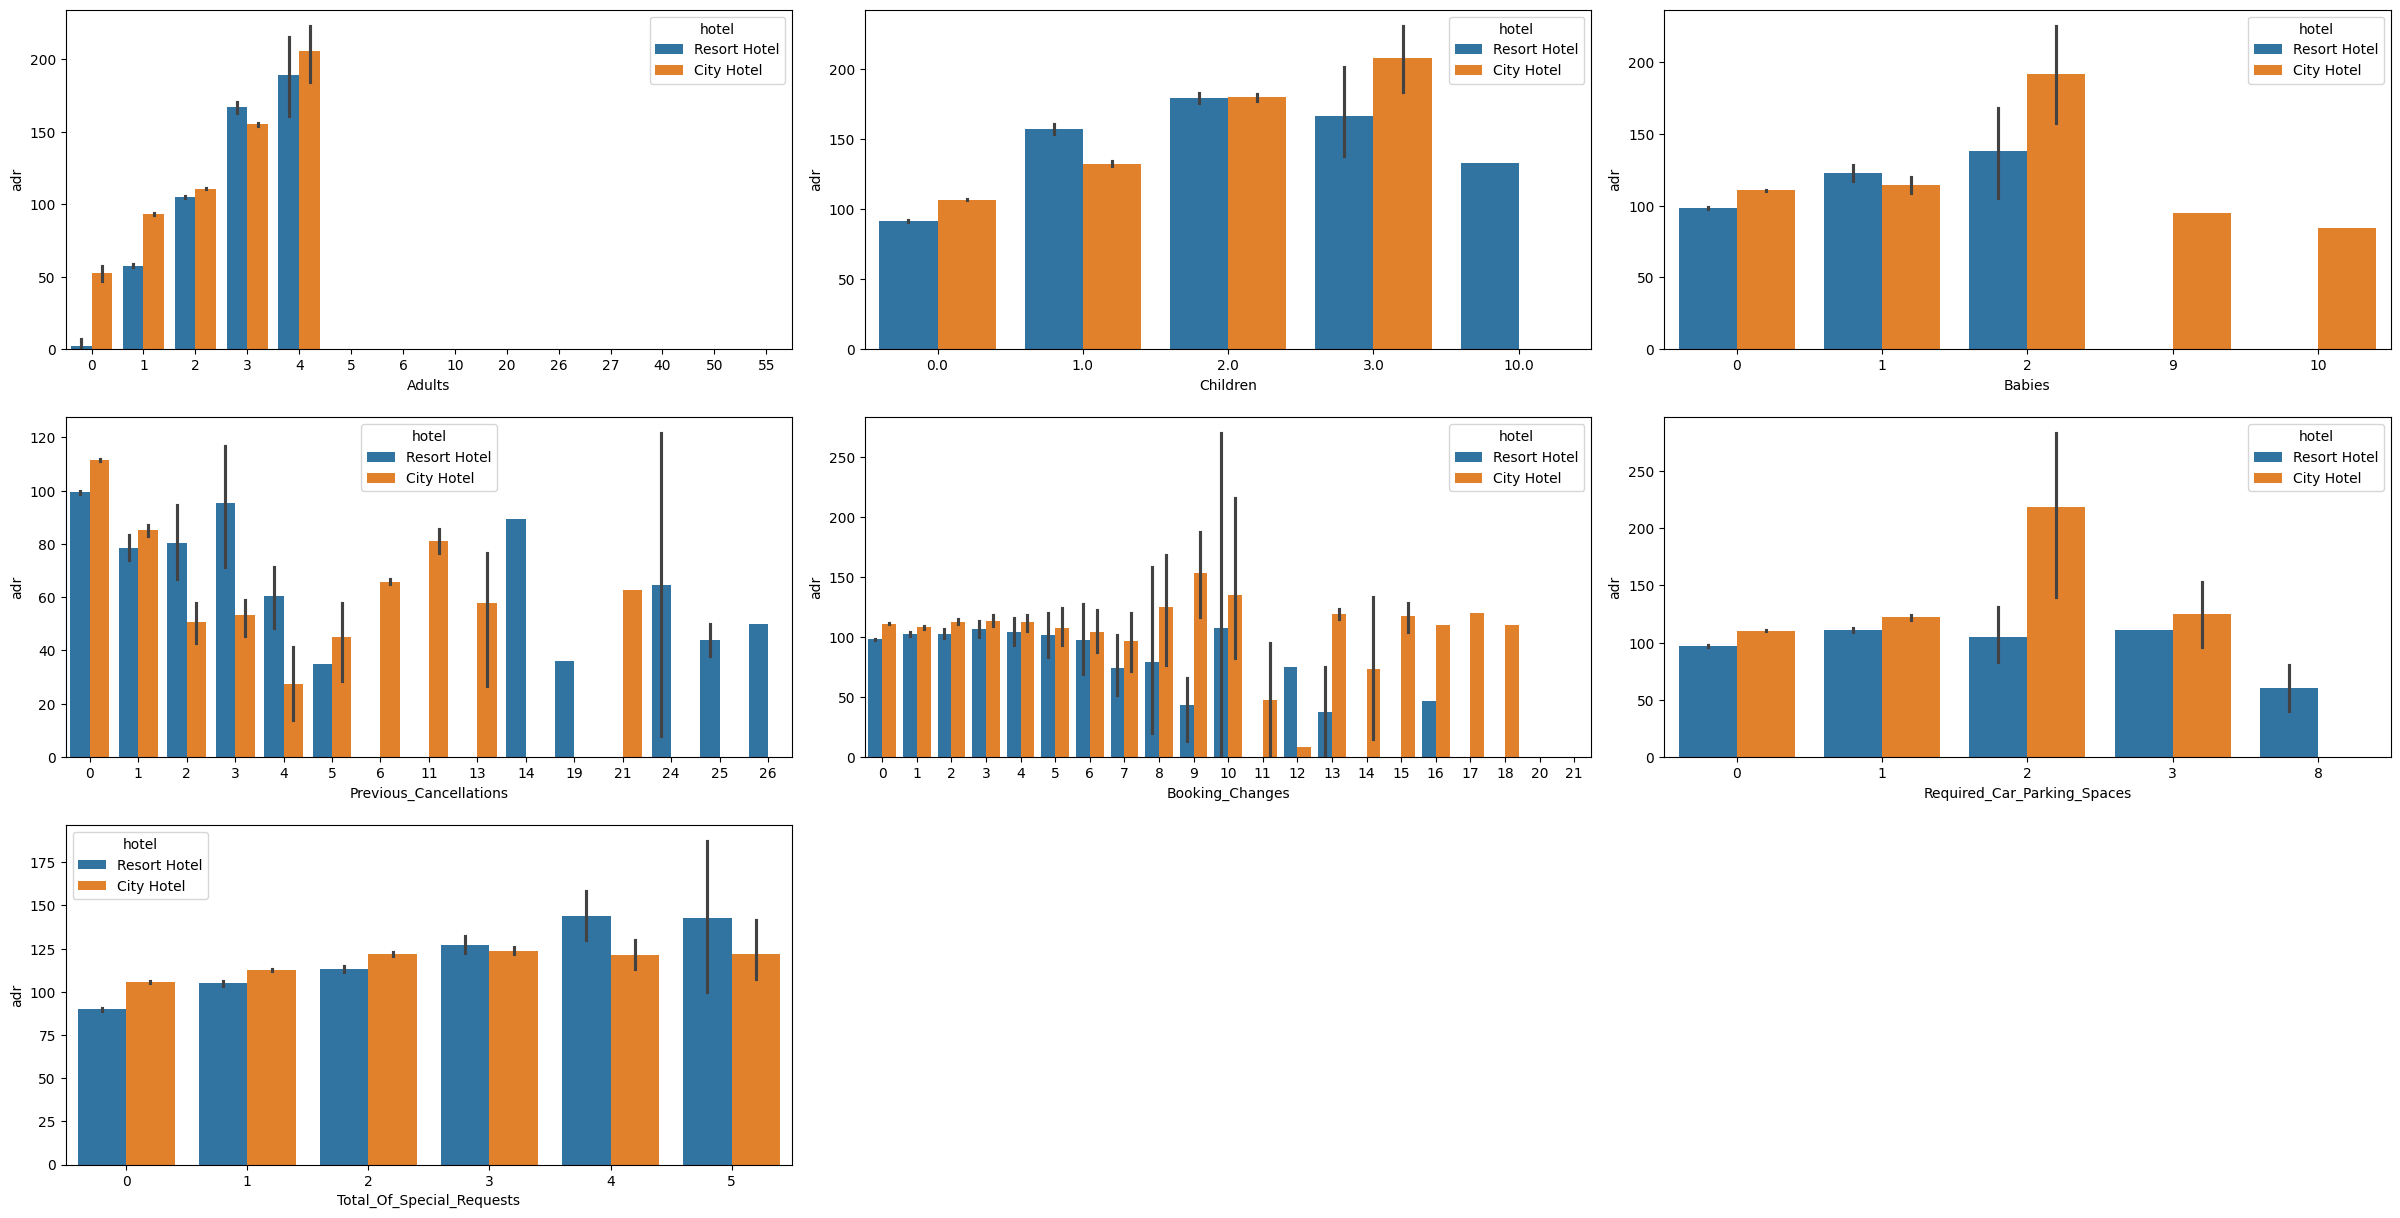

In [ ]:
dep_var = 'adr'
num_cols = ['adults', 'children', 'babies', 'previous_cancellations',
            'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']
try:
    num_cols.remove(dep_var)
except:
    pass
col_num = 3

plot_bivariate_subplots(df = df,
                        dep_var = dep_var,
                        col_num = col_num,
                        figsize = (30,15),
                        plot_type = 'bar',
                        hue = 'hotel',
                        palette = None, #sns.color_palette("flare"),
                        wspace = 0.1,
                        hspace = 0.2,
                        numeric_columns = num_cols)

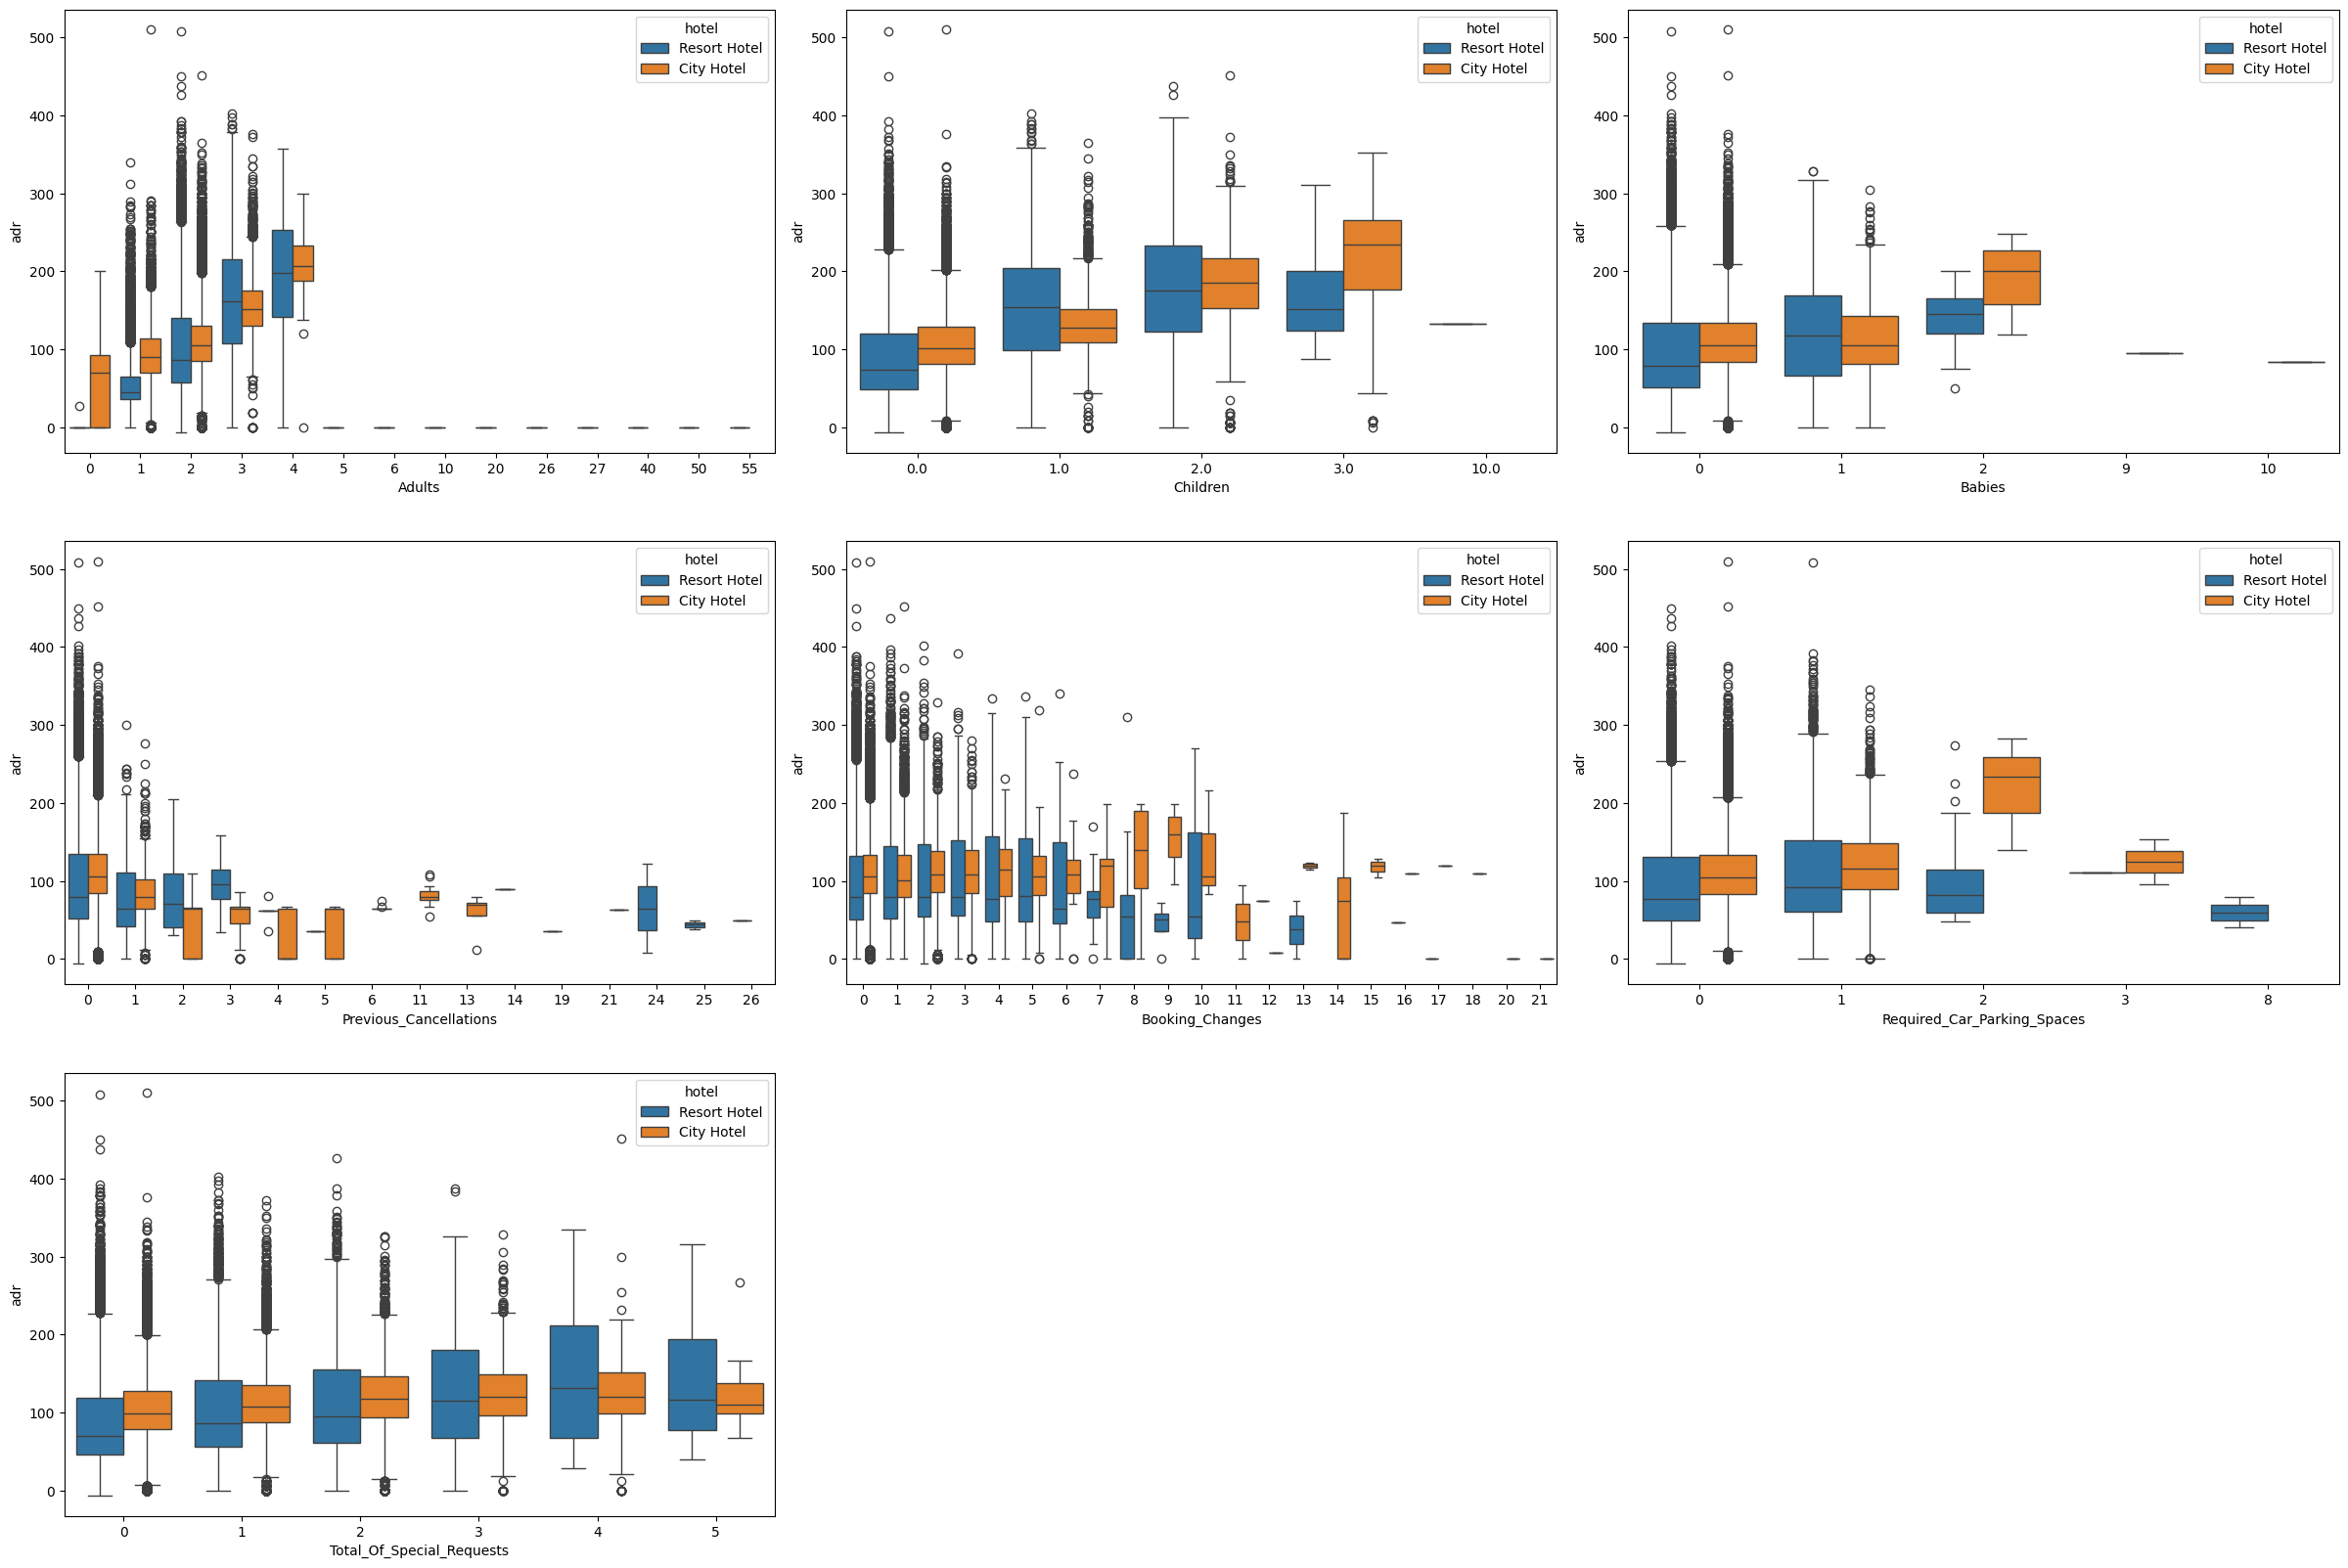

In [ ]:
dep_var = 'adr'
num_cols = ['adults', 'children', 'babies', 'previous_cancellations',
            'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']
try:
    num_cols.remove(dep_var)
except:
    pass
col_num = 3

plot_bivariate_subplots(df = df,
                        dep_var = dep_var,
                        col_num = col_num,
                        figsize = (30,20),
                        plot_type = 'box',
                        hue = 'hotel',
                        palette = None, #sns.color_palette("flare"),
                        wspace = 0.1,
                        hspace = 0.2,
                        numeric_columns = num_cols)

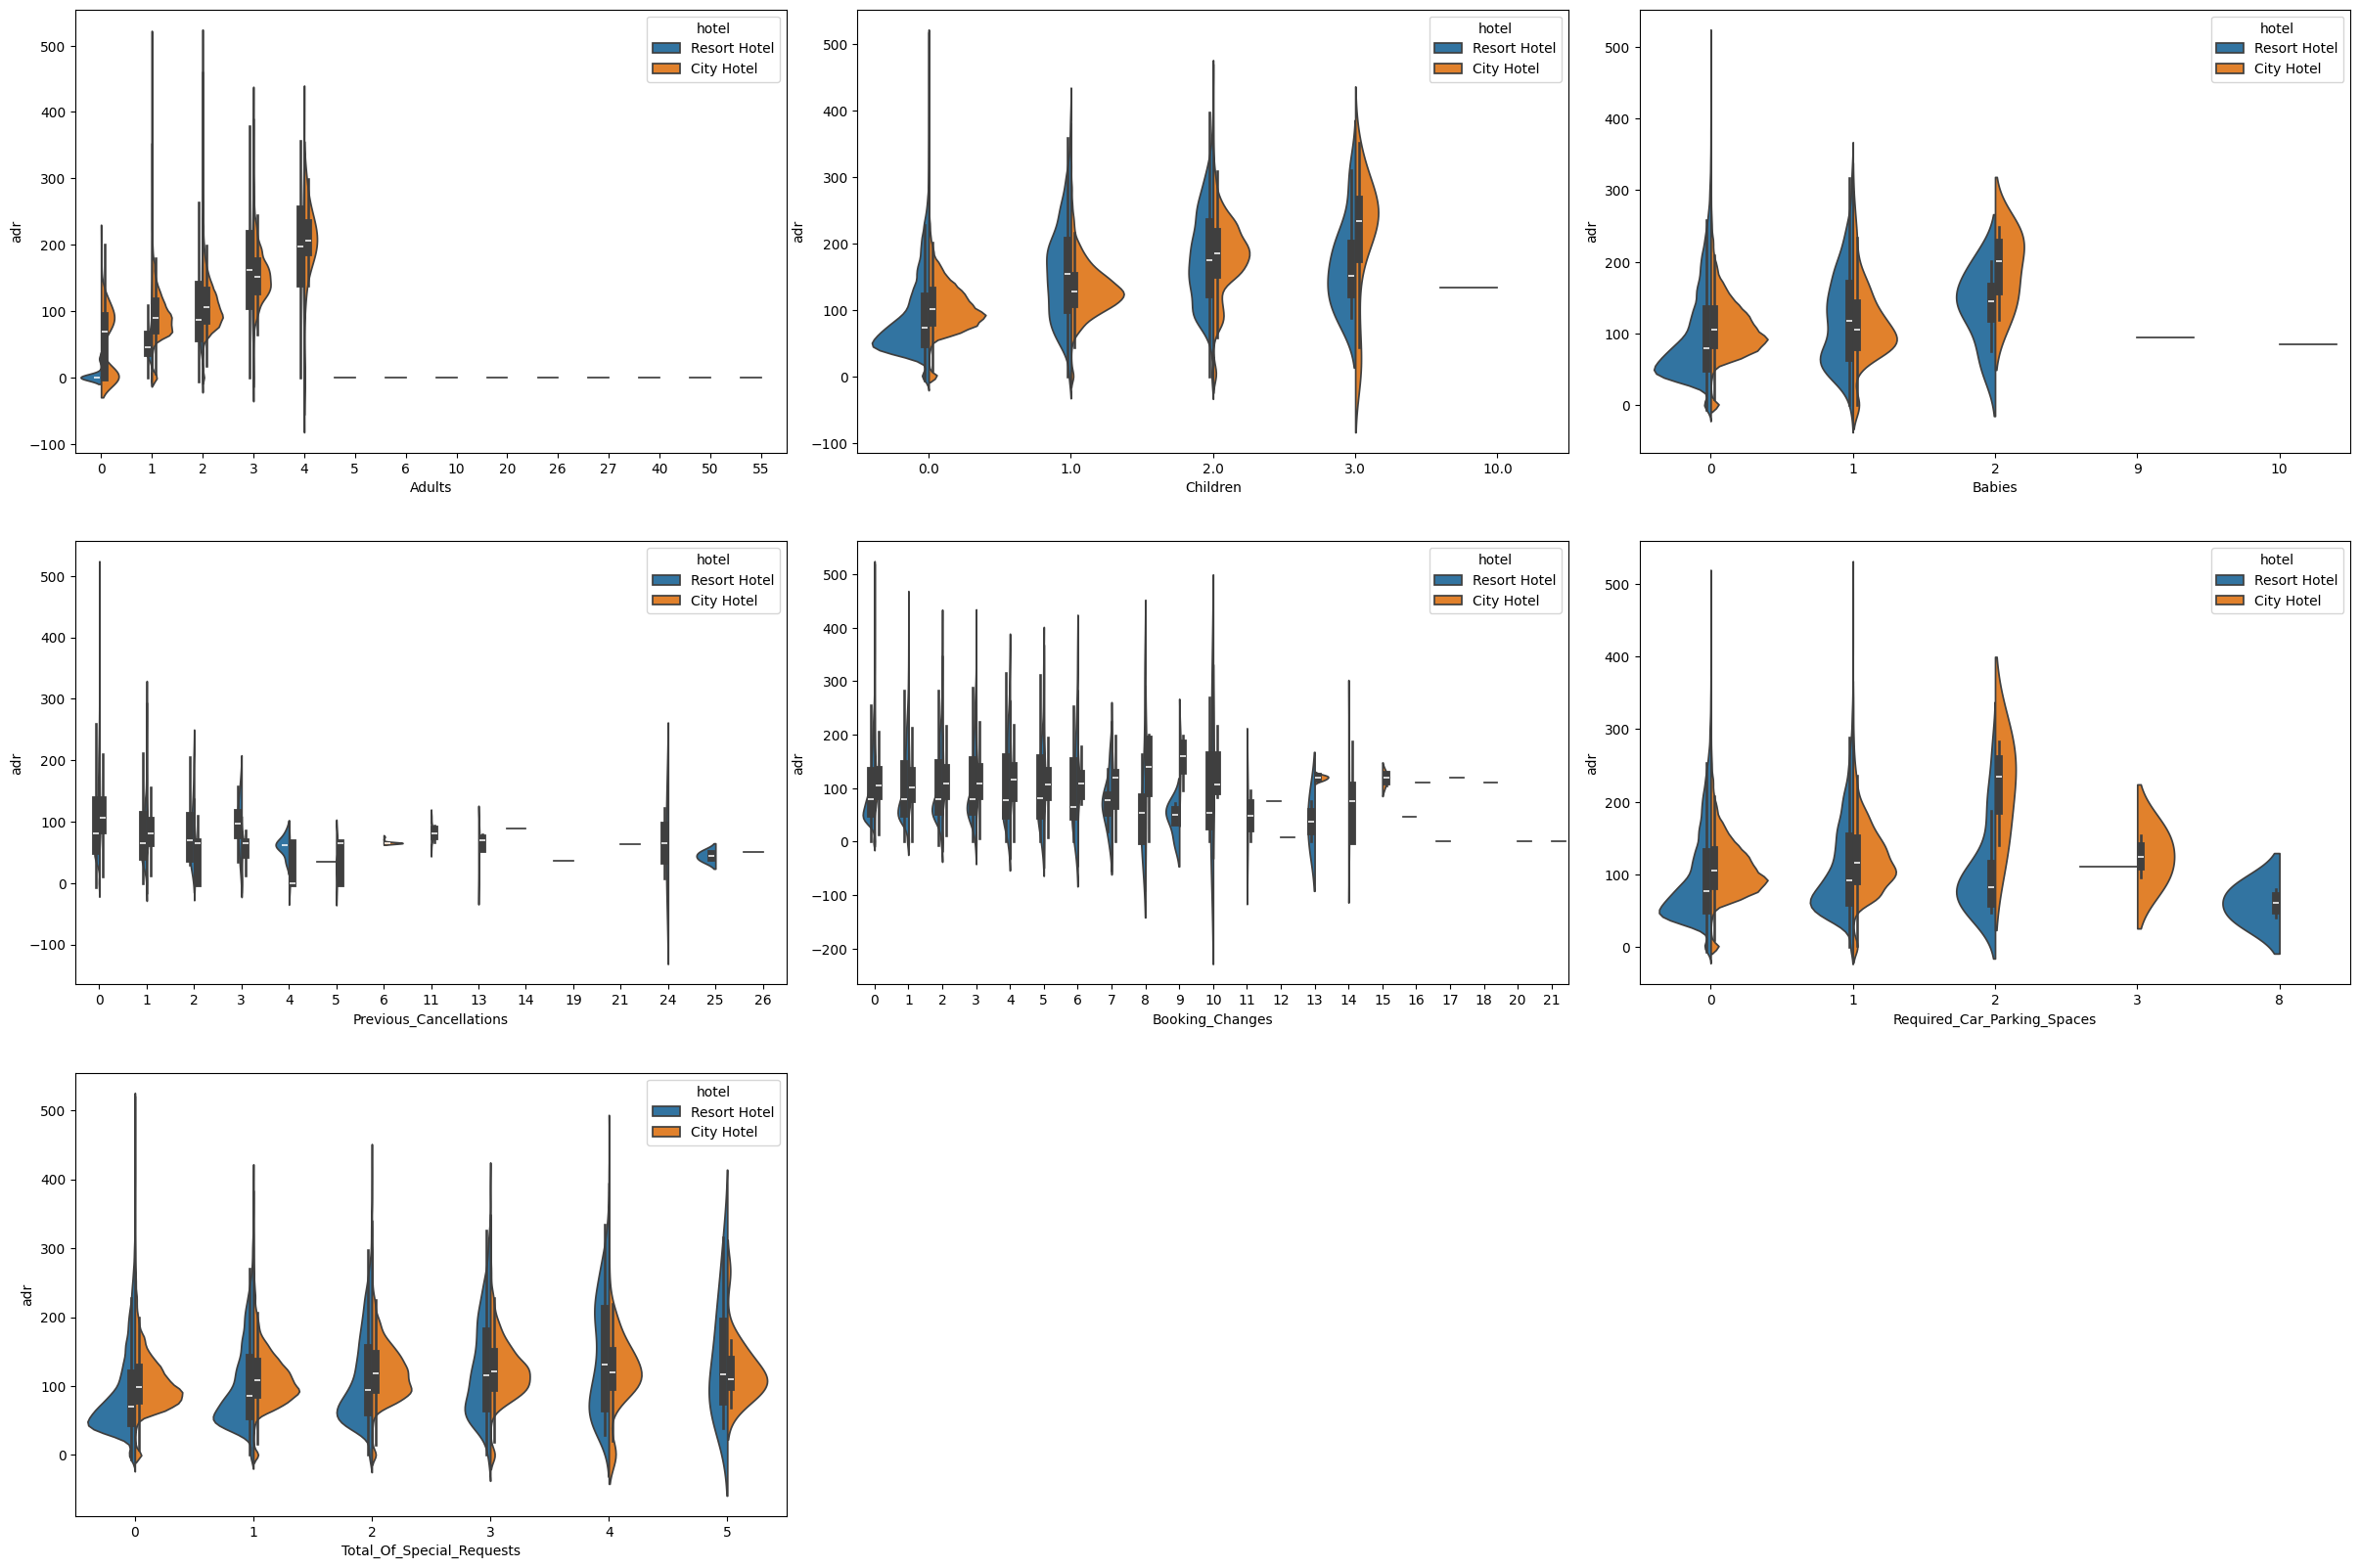

In [ ]:
dep_var = 'adr'
num_cols = ['adults', 'children', 'babies', 'previous_cancellations',
            'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']
try:
    num_cols.remove(dep_var)
except:
    pass
col_num = 3

plot_bivariate_subplots(df = df,
                        dep_var = dep_var,
                        col_num = col_num,
                        figsize = (30,20),
                        plot_type = 'violin',
                        hue = 'hotel',
                        palette = None, #sns.color_palette("flare"),
                        split = True,
                        wspace = 0.1,
                        hspace = 0.2,
                        numeric_columns = num_cols)

In [ ]:
#ML to predict cancellations

In [ ]:
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
full_data_cln = df.fillna(nan_replacements)

full_data_cln["meal"].replace("Undefined", "SC", inplace=True)

zero_guests = list(full_data_cln.loc[full_data_cln["adults"] + full_data_cln["children"] + full_data_cln["babies"]==0].index)
full_data_cln.drop(full_data_cln.index[zero_guests], inplace=True)#rows with 0 adults, 0 children, 0 babies are removed

In [ ]:
resort_h = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel") & (full_data_cln["is_canceled"] == 0)]
city_h = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel") & (full_data_cln["is_canceled"] == 0)]

In [ ]:
Airline_data = full_data_cln.loc[full_data_cln["market_segment"]== "Aviation"][["is_canceled","adults","lead_time","adr_pp",]]
Non_Airline_data = full_data_cln.loc[full_data_cln["market_segment"]!= "Aviation"][["is_canceled","adults","lead_time","adr_pp",]].describe()

In [ ]:
full_data_cln["adr_pp"] = full_data_cln["adr"] / (full_data_cln["adults"] + full_data_cln["children"])

In [ ]:
Airline_data

,is_canceled,adults,lead_time,adr_pp
49013,1,1,5,95.0
49372,1,1,1,95.0
49411,1,1,1,95.0
50468,1,1,3,110.0
50843,1,1,11,95.0
...,...,...,...,...
114540,0,1,0,95.0
114579,0,1,0,95.0
114582,0,1,2,110.0
114706,0,1,0,95.0


In [ ]:
Non_Airline_data

,is_canceled,adults,lead_time,adr_pp
count,118975.000000,118975.000000,118975.000000,118971.000000
mean,0.371061,1.860878,104.306031,55.038212
std,0.483091,0.574499,106.888885,29.016998
min,0.000000,0.000000,0.000000,-3.190000
25%,0.000000,2.000000,18.000000,37.440000
50%,0.000000,2.000000,69.000000,49.500000
75%,1.000000,2.000000,161.000000,66.000000
max,1.000000,55.000000,737.000000,2700.000000


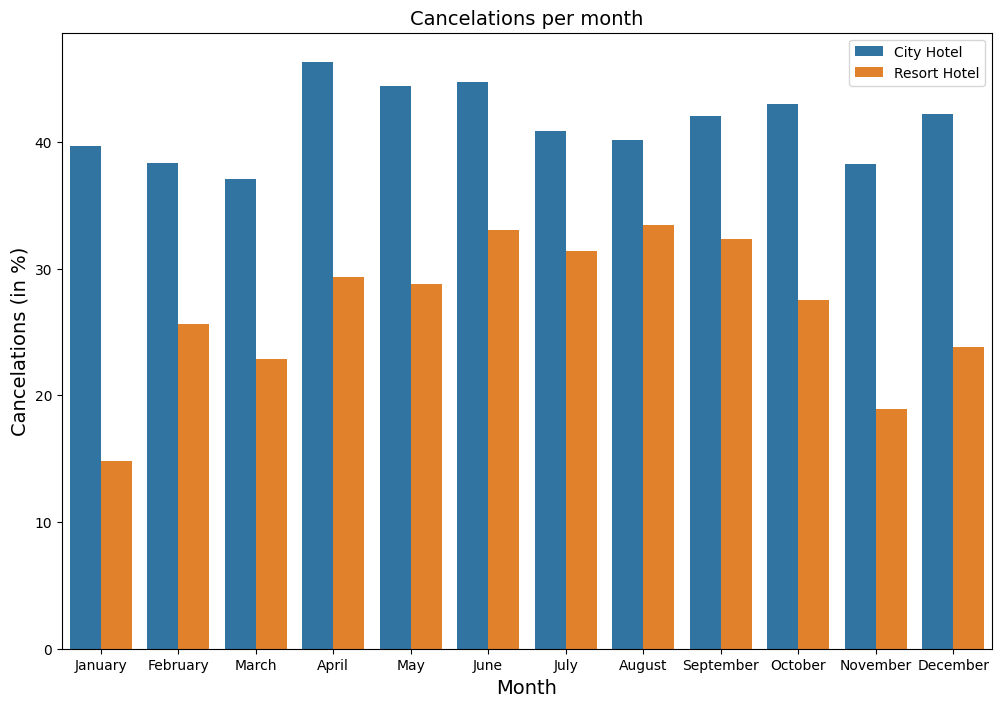

In [ ]:
res_book_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel", "Month": list(res_book_per_month.index), "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel", "Month": list(cty_book_per_month.index), "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Cancelations (in %)", fontsize=14)
plt.legend(loc="upper right")
plt.show()

In [ ]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

features = num_features + cat_features
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

num_transformer = SimpleImputer(strategy="constant")

cat_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")), ("onehot", OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
base_models = [("DT_model", DecisionTreeClassifier(random_state=40)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]


kfolds = 4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    cv_results = cross_val_score(model_steps, X, y,cv=split,scoring="accuracy",n_jobs=-1)
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

DT_model cross validation accuarcy score: 0.8246 +/- 0.0016 (std) min: 0.8221, max: 0.8263
RF_model cross validation accuarcy score: 0.8664 +/- 0.0012 (std) min: 0.8646, max: 0.8676
LR_model cross validation accuarcy score: 0.7937 +/- 0.0011 (std) min: 0.7921, max: 0.7951
XGB_model cross validation accuarcy score: 0.8456 +/- 0.0004 (std) min: 0.8451, max: 0.8461


In [ ]:
model_pipe.fit(X,y)

onehot_columns = list(model_pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].
                      get_feature_names_out(input_features=cat_features))

feat_imp_list = num_features + onehot_columns

feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(model_pipe.named_steps['model'], feature_names=feat_imp_list)
feat_imp_df.head(10)

,feature,weight,std
0,lead_time,0.145140,0.015235
1,deposit_type_Non Refund,0.140641,0.108007
2,adr,0.096222,0.003412
3,deposit_type_No Deposit,0.079059,0.106235
4,arrival_date_day_of_month,0.069410,0.002033
5,arrival_date_week_number,0.053763,0.001999
6,total_of_special_requests,0.050567,0.013314
7,agent,0.043060,0.006392
8,stays_in_week_nights,0.041588,0.002291
9,previous_cancellations,0.038626,0.013459


In [ ]:
import eli5

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=b7fe49d307514fd537087b999645c4a45a92acf820db1ceb4322810da2defa3b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
rf_model_enh = RandomForestClassifier(n_estimators=160, max_features=0.4, min_samples_split=2, n_jobs=-1, random_state=0)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model_enh)])

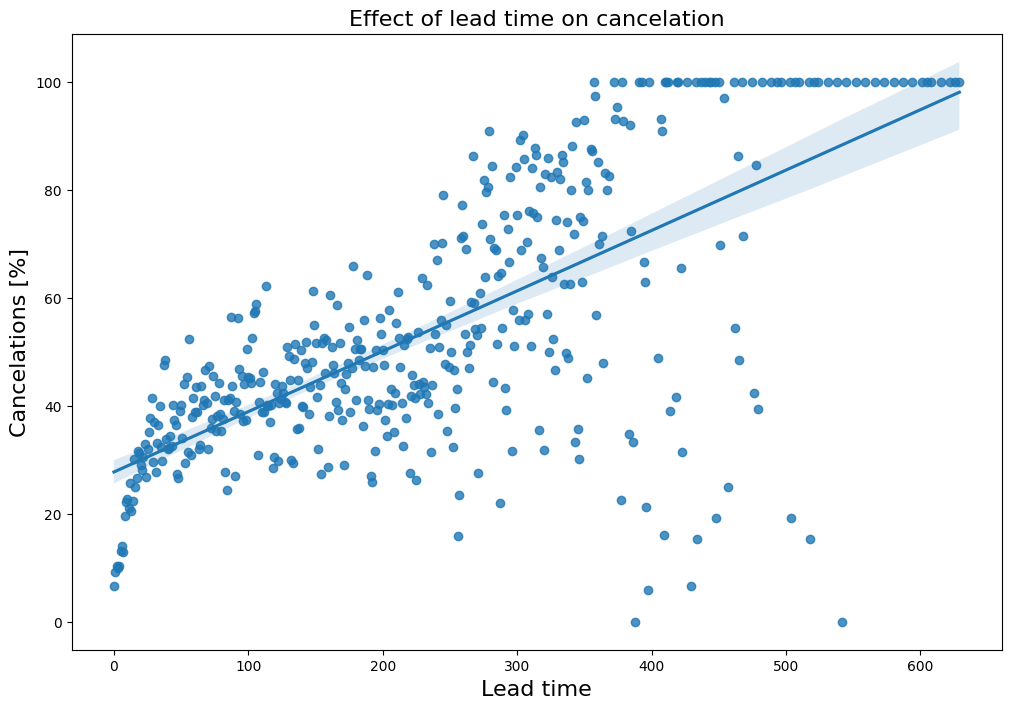

In [ ]:
lead_cancel_data = full_data_cln.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=14)
plt.ylabel("Cancelations [%]", fontsize=14)
plt.show()

In [ ]:
#conclusion -- booking made few days before arrival date are rarely canceled whereeas bookings made a year in advance have more chances of getting cancelled

In [ ]:
full_cancel_data

,Hotel,Month,Bookings,Cancelations,cancel_percent
0,Resort Hotel,April,3609,1059,29.343308
1,Resort Hotel,August,4894,1637,33.449121
2,Resort Hotel,December,2645,631,23.856333
3,Resort Hotel,February,3102,794,25.596389
4,Resort Hotel,January,2191,325,14.833409
5,Resort Hotel,July,4573,1436,31.401706
6,Resort Hotel,June,3044,1007,33.081472
7,Resort Hotel,March,3334,763,22.885423
8,Resort Hotel,May,3559,1024,28.772127
9,Resort Hotel,November,2435,460,18.891170
